In [1]:
import sys
!conda install --yes --prefix {sys.prefix} pillow
!conda install --yes --prefix {sys.prefix} pydot
!conda install --yes --prefix {sys.prefix} mlxtend --channel conda-forge
!conda install --yes --prefix {sys.prefix} keras




Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.11
  latest version: 4.7.11

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/dacer/anaconda3/envs/proyecto

  added / updated specs:
    - pillow


The following packages will be UPDATED:

  openssl            conda-forge::openssl-1.1.1c-h516909a_0 --> pkgs/main::openssl-1.1.1d-h7b6447c_1

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2019.9.1~ --> pkgs/main::ca-certificates-2019.5.15-1
  certifi             conda-forge::certifi-2019.9.11-py37_0 --> pkgs/main::certifi-2019.6.16-py37_1


Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.11
  latest version: 4.7.11

Please update conda by running

  

In [2]:
import csv
import pydot
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
import sklearn
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import scipy.stats as stats
import random
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
import warnings
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import tensorflow.keras as kr


/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/dacer/anaconda3/envs/proyecto/lib/pyt

In [3]:
trainx=pd.read_csv("./HeartDisease.csv")

In [4]:
print(trainx.head())

   ID  Age  Sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   1   28    1   2     130.0  132.0  0.0      2.0    185.0    0.0      0.0   
1   2   29    1   2     120.0  243.0  0.0      0.0    160.0    0.0      0.0   
2   3   29    1   2     140.0    NaN  0.0      0.0    170.0    0.0      0.0   
3   4   30    0   1     170.0  237.0  0.0      1.0    170.0    0.0      0.0   
4   5   31    0   2     100.0  219.0  0.0      1.0    150.0    0.0      0.0   

   num    Place  
0    0  Hungary  
1    0  Hungary  
2    0  Hungary  
3    0  Hungary  
4    0  Hungary  


In [5]:
trainx.describe()

,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,457.000000,457.000000,457.000000,457.000000,424.000000,431.000000,403.000000,455.000000,424.000000,424.000000,421.000000,457.000000
mean,229.000000,50.962801,0.796499,3.155361,131.488208,200.048724,0.138958,0.356044,134.910377,0.358491,0.622090,0.459519
std,132.068795,9.219588,0.403043,0.943548,18.829454,113.463794,0.346332,0.590529,24.251177,0.480124,0.922115,0.498905
min,1.000000,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-2.600000,0.000000
25%,115.000000,45.000000,1.000000,2.000000,120.000000,171.000000,0.000000,0.000000,118.000000,0.000000,0.000000,0.000000
50%,229.000000,52.000000,1.000000,3.000000,130.000000,220.000000,0.000000,0.000000,135.000000,0.000000,0.000000,0.000000
75%,343.000000,57.000000,1.000000,4.000000,140.000000,269.500000,0.000000,1.000000,150.000000,1.000000,1.000000,1.000000
max,457.000000,75.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,1.000000


Pasamos la variable de lugar a numerica. 0 para hungary, 1 para VA y 2 para otros

In [6]:
train = trainx.copy()
train["Place"][(train["Place"] != "VA") & (train["Place"] != "Hungary")] = 2
train["Place"][train["Place"] == "Hungary"] = 0
train["Place"][train["Place"] == "VA"] = 1
#
#pdf = train["Place"][(train["Place"] != "VA") & (train["Place"] != "Hungary")]

/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/ind

# Diagramas
Para la primera parte del proyecto se pide realizar histogramas y diagrmas de torta con los datos cargados en el paso anterior para lo cual se deben convertir a enteros mediante la funcion convertirentero, para los histogramas usamos la funcion graficar y para los diagramas de torta la funcion graficarpie, al final tenemos un for que recorre cada columna del dataFrame y la pasa a la funcion correspondiente, como se ve a continuacion:


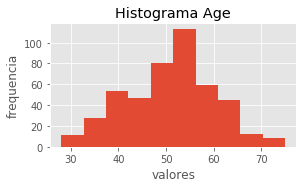

<Figure size 432x288 with 0 Axes>

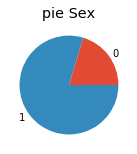

<Figure size 432x288 with 0 Axes>

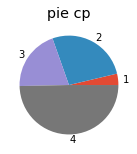

/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


<Figure size 432x288 with 0 Axes>

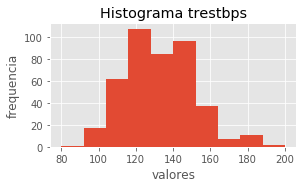

<Figure size 432x288 with 0 Axes>

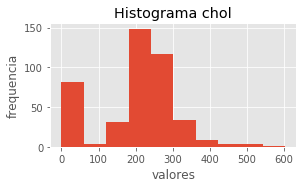

<Figure size 432x288 with 0 Axes>

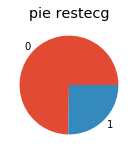

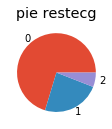

<Figure size 432x288 with 0 Axes>

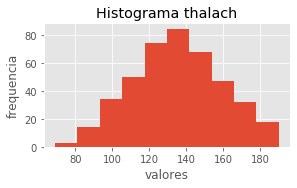

<Figure size 432x288 with 0 Axes>

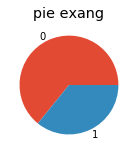

<Figure size 432x288 with 0 Axes>

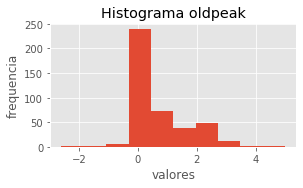

<Figure size 432x288 with 0 Axes>

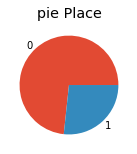

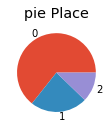

<Figure size 432x288 with 0 Axes>

In [7]:
def graficar(vector, nombre):
    fig = plt.figure(figsize=(15,5))
    plt.subplot2grid((2,3),(0,0))
    plt.hist(vector, 10)
    plt.ylabel('frequencia')
    plt.xlabel('valores')
    plt.title('Histograma'+ ' ' + nombre)
    plt.show()
    plt.clf()
    
def graficarpie(vector, nombre):
    fig = plt.figure(figsize=(15,5))
    veces0 = np.count_nonzero(vector == 0)
    veces1 = np.count_nonzero(vector == 1)
    veces2 = np.count_nonzero(vector == 2)
    veces3 = np.count_nonzero(vector == 3)
    veces4 = np.count_nonzero(vector == 4)
    if veces0 != 0 and veces1 != 0:
        plt.subplot2grid((2,3),(0,0))
        plt.pie([veces0,veces1],labels =["0","1"])
        plt.title('pie'+ ' ' + nombre)
        plt.show()
        plt.clf()
    if veces0 != 0 and veces1 != 0 and veces2 != 0:
        plt.subplot2grid((2,3),(0,0))
        plt.pie([veces0,veces1,veces2],labels =["0","1","2"])
        plt.title('pie'+ ' ' + nombre)
        plt.show()
        plt.clf()
    if veces1 != 0 and veces2 != 0 and veces3 != 0 and veces4 != 0:
        plt.subplot2grid((2,3),(0,0))
        plt.pie([veces1,veces2,veces3,veces4],labels =["1","2","3","4"])
        plt.title('pie'+ ' ' + nombre)
        plt.show()
        plt.clf()


for columna in train:
    if columna == "oldpeak" or columna == "thalach" or columna == "chol" or columna == "trestbps" or columna == "Age":
        graficar(train[columna].values,columna)
    elif columna == "Sex" or columna == "Place" or columna == "exang" or columna == "restecg" or columna == "fps" or columna == "cp":
        graficarpie(train[columna].values,columna)
    
        
    


In [8]:
train.describe()


,ID,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,457.000000,457.000000,457.000000,457.000000,424.000000,431.000000,403.000000,455.000000,424.000000,424.000000,421.000000,457.000000
mean,229.000000,50.962801,0.796499,3.155361,131.488208,200.048724,0.138958,0.356044,134.910377,0.358491,0.622090,0.459519
std,132.068795,9.219588,0.403043,0.943548,18.829454,113.463794,0.346332,0.590529,24.251177,0.480124,0.922115,0.498905
min,1.000000,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-2.600000,0.000000
25%,115.000000,45.000000,1.000000,2.000000,120.000000,171.000000,0.000000,0.000000,118.000000,0.000000,0.000000,0.000000
50%,229.000000,52.000000,1.000000,3.000000,130.000000,220.000000,0.000000,0.000000,135.000000,0.000000,0.000000,0.000000
75%,343.000000,57.000000,1.000000,4.000000,140.000000,269.500000,0.000000,1.000000,150.000000,1.000000,1.000000,1.000000
max,457.000000,75.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,1.000000


In [9]:
print(train.head())

   ID  Age  Sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0   1   28    1   2     130.0  132.0  0.0      2.0    185.0    0.0      0.0   
1   2   29    1   2     120.0  243.0  0.0      0.0    160.0    0.0      0.0   
2   3   29    1   2     140.0    NaN  0.0      0.0    170.0    0.0      0.0   
3   4   30    0   1     170.0  237.0  0.0      1.0    170.0    0.0      0.0   
4   5   31    0   2     100.0  219.0  0.0      1.0    150.0    0.0      0.0   

   num Place  
0    0     0  
1    0     0  
2    0     0  
3    0     0  
4    0     0  


* Como se puede observar este dataset no se encuentra con los datos completos


In [10]:
print(train.isnull().sum().sum())

217


### Analizamos como rellenar los datos faltantes
- En el colesterol (chol) es interesante pensar en el promedio, 
    aunque se me ocurren muchas maneras, como poner el promedio de similares.
- En la presion arterial con la que ingresaron (trestbps) es interesante utilizar promedio
    aunque plantear el uso de similitudes se debe considerar.
- En el campo que indica si si tiene el azucar en la sangre > 120 mg/dl (fbs) se debe considerar que 1 es para true
    y 0 es para false, sin embargo no es un campo que podamos rellenar a la ligera
    por lo tanto se debe considerar si se elimina.
- Los resultados electrocardiográficos en reposo (restecg) son Value 0: normal, Value 1: con anormalidad de la onda ST-T (inversiones de la onda T y / o elevación o depresión del ST> 0.05 mV) y Valor 2: muestra hipertrofia ventricular izquierda probable o definitiva según los criterios de Estes. Por todo lo anterior rellenarlos no es factible con el promedio.
- La frecuencia cardíaca máxima alcanzada (thalach) es otro atributo que se puede relenar con promedios pero
    considerando que esto es un principal sintoma de afeciones cardiacas, por lo que recomiendo
    utilizar el promedio pero de los que poseen afecciones en caso de afectado, o promedio de los que no en caso
    de ser una persona que no se le encontro afeciones cardiacas.
- La depresión del ST inducida por el ejercicio relativo al descanso (oldpeak) tiene como valores Valor 1: pendiente ascendente - Valor 2: plano - Valor 3: pendiente descendente. este valor no es factible rellenarlo
- La angina inducida por ejercicio (1 = sí; 0 = no) (exang) es otro valor que conviene analizar la forma de rellenarlo, ya que aplicar un simple promedio no es valido.

    


## Rellenando los datos con ayuda medica
Para tener unos datos mas confiables la información restante se completa utilizando el criterios medicos encontrados en la web y con la ayuda del medico Camilo Gines quien presto su asesoramiento en temas cardiacos. Por tal motivo los se definen los datos faltamtes de esta forma:

- En el colesterol (chol) se rellena con promedio, pero relacionando afeciones cardiacas con dicho promedio, es decir si el dato faltante corresponde a una persona con afeccion cardiaca se rellena con promedio de afecciones cardiacas.

In [11]:
cholPromDisease = train["chol"][train["num"] == 1].mean()
cholPromNotDisease = train["chol"][train["num"] == 0].mean()
#Se reemplaza segun cirterio de daño y colesterol
train["chol"][train["num"] == 0] = train["chol"].fillna(cholPromNotDisease)
train["chol"][train["num"] == 1] = train["chol"].fillna(cholPromDisease)
print("Promedio de colesteros de los que NO tienen alguna cardiopatia o enfermedad cardiovascular")
print(cholPromNotDisease)
print("Promedio de colesteros de los que tienen alguna cardiopatia o enfermedad cardiovascular")
print(cholPromDisease)

print(train.isnull().sum().sum())
#.mean ()

Promedio de colesteros de los que NO tienen alguna cardiopatia o enfermedad cardiovascular
217.30701754385964
Promedio de colesteros de los que tienen alguna cardiopatia o enfermedad cardiovascular
180.66502463054186
191


/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


- En la presion arterial con la que ingresaron (trestbps) se plantea el mismo tipo de promedio que en Colesterol

In [12]:
trestbpsPromDisease = train["trestbps"][train["num"] == 1].mean()
trestbpsPromNotDisease = train["trestbps"][train["num"] == 0].mean()
#Se reemplaza segun cirterio de daño y presion de ingreso
train["trestbps"][train["num"] == 0] = train["trestbps"].fillna(trestbpsPromNotDisease)
train["trestbps"][train["num"] == 1] = train["trestbps"].fillna(trestbpsPromDisease)
print("Promedio de presion arterial de los que NO tienen alguna cardiopatia o enfermedad cardiovascular")
print(trestbpsPromNotDisease)
print("Promedio de presion arterial de los que tienen alguna cardiopatia o enfermedad cardiovascular")
print(trestbpsPromDisease)
print("Se observa que no hay mucha diferencia entre promedios")
print(train.isnull().sum().sum())

Promedio de presion arterial de los que NO tienen alguna cardiopatia o enfermedad cardiovascular
130.3920704845815
Promedio de presion arterial de los que tienen alguna cardiopatia o enfermedad cardiovascular
132.751269035533
Se observa que no hay mucha diferencia entre promedios
158


/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


- La frecuencia cardíaca máxima alcanzada (thalach) se rellena igual que el colesterol

In [13]:
thalachPromDisease = train["thalach"][train["num"] == 1].mean()
thalachPromNotDisease = train["thalach"][train["num"] == 0].mean()
#Se reemplaza segun cirterio de daño y presion de ingreso
train["thalach"][train["num"] == 0] = train["thalach"].fillna(trestbpsPromNotDisease)
train["thalach"][train["num"] == 1] = train["thalach"].fillna(trestbpsPromDisease)
print("Promedio de frecuencia cardiaca de los que NO tienen alguna cardiopatia o enfermedad cardiovascular")
print(thalachPromNotDisease)
print("Promedio de frecuencia cardiaca de los que tienen alguna cardiopatia o enfermedad cardiovascular")
print(thalachPromDisease)

print(train.isnull().sum().sum())

Promedio de frecuencia cardiaca de los que NO tienen alguna cardiopatia o enfermedad cardiovascular
141.88105726872246
Promedio de frecuencia cardiaca de los que tienen alguna cardiopatia o enfermedad cardiovascular
126.87817258883248
125


/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


- El valor de angina por ejercicio es muy interesante de analizar. Esta condicion se presenta normalmente en personas mayores de 30 (mujeres 35/40) con enfermedad arterial coronaria (EAC), es decir se presenta cuando aparece una condicion cardiaca y como el estrechamiento de la válvula aórtica del corazón (estenosis aórtica). que tambien se relaciona con taponamientos debido a altos niveles de colesterol. Dado lo anterior se propone rellenar este valor dependiendo de si presenta una afeccion cardiaca, si tiene un colestrol alto y si es mayor de 35.

In [14]:
train["exang"][(train["num"] == 1) & (train["Age"] > 35) & (train["chol"] > 160.0 ) ] = train["exang"].fillna(1)
train["exang"][(train["num"] == 1) & (train["Age"] < 30) & (train["chol"] < 130.0 ) ] = train["exang"].fillna(0)
train["exang"][(train["num"] == 0) & (train["Age"] > 35) & (train["chol"] > 190.0 ) ] = train["exang"].fillna(1)
train["exang"][(train["num"] == 0) & (train["Age"] < 30) & (train["chol"] > 130.0 ) ] = train["exang"].fillna(0)
train["exang"]=train["exang"].fillna(0)


/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

- Para los valores de glucosa (FBS) es interesante conocer que los niveles altos de clucosa se asocian con la diabetes que es uno de los factores mas reconocidos de la aparicion de cardiopatias, es por eso que este valor se puede rellenar considerando los valores de cardiopatias. Tambien se asocia las cardiopatias diabeticas y el colesterol alto. Por lo anterior se utilizaran estos 2 valores para aportar mas información al dataset

In [15]:
train["fbs"][(train["num"] == 1) & (train["chol"] > 130.0 ) ] = train["exang"].fillna(1)
train["fbs"][(train["num"] == 0) & (train["chol"] > 130.0 ) ] = train["exang"].fillna(0)
train["fbs"]=train["fbs"].fillna(0)



/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Valores de electrocardiogramas y segmentos ST
Para estos valores hacer analisis sobre los datos es muy complejo, ya que son el resultado de medotod medicos muy especificos, es por tal motivo que se decide eliminar estos valores.

In [16]:
del train["restecg"]
del train["oldpeak"]
print("Se cuenta cuantos valores estan en NaN")
print(train.isnull().sum().sum())

Se cuenta cuantos valores estan en NaN
0


In [17]:
print(train.head())
train.describe()


   ID  Age  Sex  cp  trestbps        chol  fbs  thalach  exang  num Place
0   1   28    1   2     130.0  132.000000  0.0    185.0    0.0    0     0
1   2   29    1   2     120.0  243.000000  0.0    160.0    0.0    0     0
2   3   29    1   2     140.0  217.307018  0.0    170.0    0.0    0     0
3   4   30    0   1     170.0  237.000000  0.0    170.0    0.0    0     0
4   5   31    0   2     100.0  219.000000  0.0    150.0    0.0    0     0


,ID,Age,Sex,cp,trestbps,chol,fbs,thalach,exang,num
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,229.000000,50.962801,0.796499,3.155361,131.476166,200.469340,0.310722,134.651221,0.380744,0.459519
std,132.068795,9.219588,0.403043,0.943548,18.138033,110.263265,0.463296,23.377752,0.486102,0.498905
min,1.000000,28.000000,0.000000,1.000000,80.000000,0.000000,0.000000,69.000000,0.000000,0.000000
25%,115.000000,45.000000,1.000000,2.000000,120.000000,179.000000,0.000000,120.000000,0.000000,0.000000
50%,229.000000,52.000000,1.000000,3.000000,130.000000,217.307018,0.000000,132.751269,0.000000,0.000000
75%,343.000000,57.000000,1.000000,4.000000,140.000000,266.000000,1.000000,150.000000,1.000000,1.000000
max,457.000000,75.000000,1.000000,4.000000,200.000000,603.000000,1.000000,190.000000,1.000000,1.000000


# ARBOL DE DESICION
Como primer paso para nuestro arbol de desicion comenzaremos a realizar un analisis a los datos de entrada para determinar el numero de datos que tenemos las instancias positivas y negativas de estos y todo lo que nos pueda brindar informacion para que nuestro arbol pueda ser lo mas exacto posible.

Para esto usaremos herramientas de conteo y analizaremos las tendencias que puedan tener los datos para ayudarnos a determinar cuales serian los mejores nodos de nuestro arbol.

In [18]:
train.shape

(457, 11)

Esto quiere decir que tenemos 11 columnas (features) y 457 filas de datos, anteriormente ya se ha hecho un analisis de los datos detalladamente con ayuda medica por lo tanto pasaremos solo a mostrar una idea de los datos con los que vamos a trabajar


In [19]:
train.head()

,ID,Age,Sex,cp,trestbps,chol,fbs,thalach,exang,num,Place
0,1,28,1,2,130.0,132.000000,0.0,185.0,0.0,0,0
1,2,29,1,2,120.0,243.000000,0.0,160.0,0.0,0,0
2,3,29,1,2,140.0,217.307018,0.0,170.0,0.0,0,0
3,4,30,0,1,170.0,237.000000,0.0,170.0,0.0,0,0
4,5,31,0,2,100.0,219.000000,0.0,150.0,0.0,0,0


Podemos ver las 11 filas que se manejaran y las primeras 4 columnas con las cuales por el numero de datos aun no es posible marcar una tedecia.

Ahora vamos a observar cuantas de las salida nos da como resultado el numero 1 y cuantas nos dan el numero 0, saber esto es importante porque nos ayudara a determinar cual es la tendecia de la salida o si los datos estan distribuidos de una forma similar.

In [20]:
print(train.groupby('num').size())

num
0    247
1    210
dtype: int64


Como resultado obtenemos que 247 de las salidas son 0 y 210  son 1, es decir que son muy iguales pero hay cierto desbalance el cual tendremos en cuenta al momento de crear el arbol, a continuación procederemos a ver la diferencia de forma grafica.

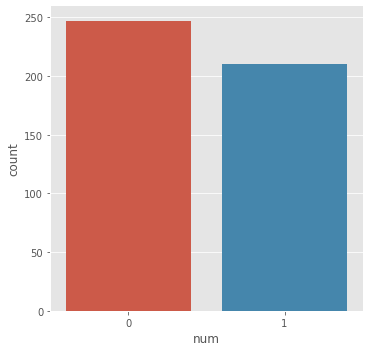

In [21]:
sb.catplot('num',data=train,kind="count")

De forma similar a como con la columna "num" podemos hacerlo con todas las columnas esto nos permitira ver que tan dispersos son los datos de entrada, vamos a hechar un vistazo con algunas de las columnas:

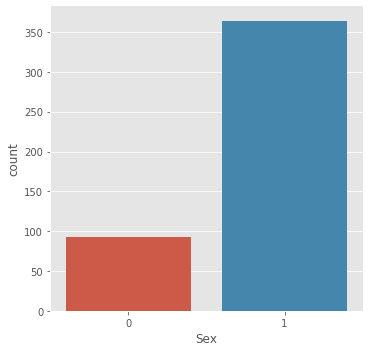

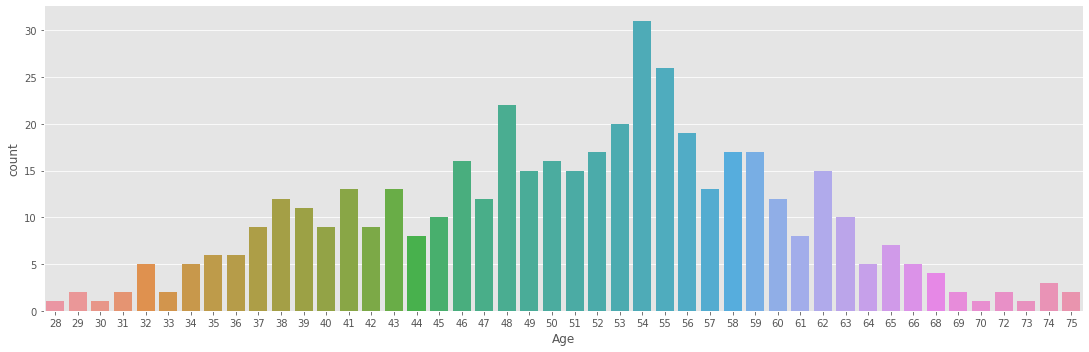

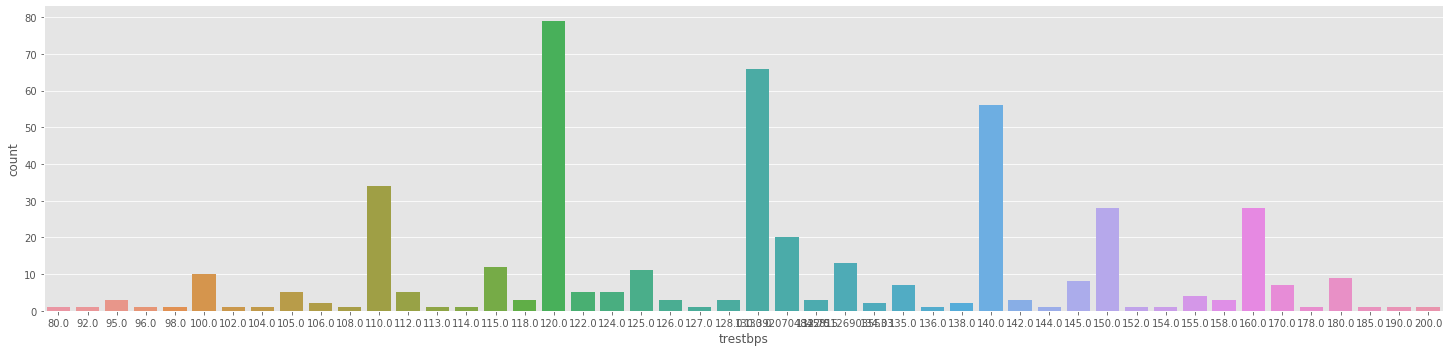

In [22]:
sb.catplot('Sex',data=train,kind="count")
sb.catplot('Age',data=train,kind="count",aspect = 3)
sb.catplot('trestbps',data=train,kind="count",aspect = 4)

En las graficas podemos observar que se marcan ciertas tendencias hacia ciertos datos lo cual nos puede ayudar a determinar los  nodos de nuestro arbol, veremos otros ejemplo de visualización de datos que nos pueden aportar información:

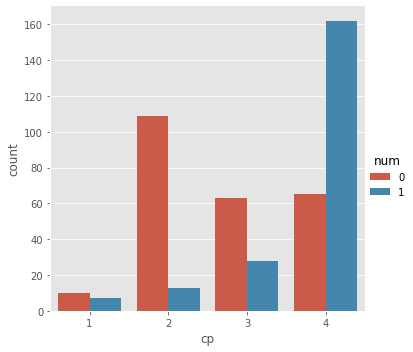

In [23]:
sb.catplot('cp',data=train,hue='num',kind="count")

Como podemos observar este grafico nos indica que cuando el valor del cp es 4 hay una mayor probabilidad de que la salida sea 1 mientras que cuando es 1,2 o 3 hay una probabilidad mas alta de que sea 0.

Ahora probamos un ultimo grafico que nos mostrara la salida segun el nivel de colesterol y la edad:


 Relacion edad-colesterol, azul positivos - naranja negativo


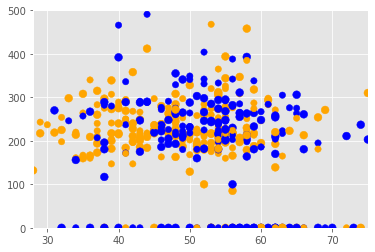

Se puede observar que los datos son dispersos y hay mayor concentracion de puntos azules en el centro del diagrama


In [24]:
print( "\n Relacion edad-colesterol, azul positivos - naranja negativo")
f1 = train['Age'].values
f2 = train['chol'].values
#Azul positivo
#Naranja Negativo
colores=['orange','blue'] # si no estaban declarados previamente
tamanios=[60,40] # si no estaban declarados previamente
 
asignar=[]
asignar2=[]
for index, row in train.iterrows():    
    asignar.append(colores[row['num']])
    asignar2.append(tamanios[row['num']])
 
plt.scatter(f1, f2, c=asignar, s=tamanios)
plt.axis([28,75,0,500])
plt.show()

print("Se puede observar que los datos son dispersos y hay mayor concentracion de puntos azules en el centro del diagrama")




# Mapeo de datos

Para poder realizar el arbol de desicion es necesario mapear los datos es decir acomodarlos en rangos donde sera mucho mas facil su manipulación, a continuacion paseremos a acomodar estos datos en un nuevo dataframe y a visualizar el nuevo resultado:

In [25]:
# Age Mapping 
train.loc[ train['Age'] <= 38, 'AgeEncoded'] = 0
train.loc[(train['Age'] > 38) & (train['Age'] <= 48), 'AgeEncoded'] = 1
train.loc[(train['Age'] > 48) & (train['Age'] <= 58), 'AgeEncoded'] = 2
train.loc[(train['Age'] > 58) & (train['Age'] <= 68), 'AgeEncoded'] = 3
train.loc[ train['Age'] > 68, 'AgeEncoded'] = 4


# trestbps Mapping 
train.loc[ train['trestbps'] <= 100, 'trestbpsEncoded'] = 0
train.loc[(train['trestbps'] > 100) & (train['trestbps'] <= 120), 'trestbpsEncoded'] = 1
train.loc[(train['trestbps'] > 120) & (train['trestbps'] <= 140), 'trestbpsEncoded'] = 2
train.loc[(train['trestbps'] > 140) & (train['trestbps'] <= 160), 'trestbpsEncoded'] = 3
train.loc[(train['trestbps'] > 160) & (train['trestbps'] <= 180), 'trestbpsEncoded'] = 4
train.loc[ train['trestbps'] > 180, 'trestbpsEncoded'] = 5

# chol Mapping 
train.loc[ train['chol'] <= 100, 'cholEncoded'] = 0
train.loc[(train['chol'] > 100) & (train['chol'] <= 200), 'cholEncoded'] = 1
train.loc[(train['chol'] > 200) & (train['chol'] <= 300), 'cholEncoded'] = 2
train.loc[(train['chol'] > 300) & (train['chol'] <= 400), 'cholEncoded'] = 3
train.loc[(train['chol'] > 400) & (train['chol'] <= 500), 'cholEncoded'] = 4
train.loc[ train['chol'] > 500, 'cholEncoded'] = 5

# thalach Mapping 
train.loc[ train['thalach'] <= 90, 'thalachEncoded'] = 0
train.loc[(train['thalach'] > 90) & (train['thalach'] <= 110), 'thalachEncoded'] = 1
train.loc[(train['thalach'] > 110) & (train['thalach'] <= 130), 'thalachEncoded'] = 2
train.loc[(train['thalach'] > 130) & (train['thalach'] <= 150), 'thalachEncoded'] = 3
train.loc[(train['thalach'] > 150) & (train['thalach'] <= 170), 'thalachEncoded'] = 4
train.loc[ train['thalach'] > 170, 'thalachEncoded'] = 5


drop_elements = ['ID','Age','trestbps','chol','thalach']
train_encoded = train.drop(drop_elements, axis = 1)
train_encoded.head()


,Sex,cp,fbs,exang,num,Place,AgeEncoded,trestbpsEncoded,cholEncoded,thalachEncoded
0,1,2,0.0,0.0,0,0,0.0,2.0,1.0,5.0
1,1,2,0.0,0.0,0,0,0.0,1.0,2.0,4.0
2,1,2,0.0,0.0,0,0,0.0,2.0,2.0,4.0
3,0,1,0.0,0.0,0,0,0.0,4.0,2.0,4.0
4,0,2,0.0,0.0,0,0,0.0,0.0,2.0,3.0


Una vez mapeados los datos vamos a mostrar como se relacionan respecto a la salida num cuando esta es 1 

In [26]:
train_encoded[['AgeEncoded', 'num']].groupby(['AgeEncoded'], as_index=False).agg(['mean', 'count', 'sum'])


num          
                mean count sum
AgeEncoded                    
0.0         0.352941    51  18
1.0         0.357724   123  44
2.0         0.481481   189  91
3.0         0.602410    83  50
4.0         0.636364    11   7

Vemos que la mayoria de casos positiva esta en los rangos 1,2 y 3 que seria entre 38 y 68 años y la mayoria casos positivos esta entre el rango 2 de edad 48 y 58 con 91.

In [27]:
train_encoded[['cholEncoded', 'num']].groupby(['cholEncoded'], as_index=False).agg(['mean', 'count', 'sum'])

num          
                 mean count sum
cholEncoded                    
0.0          0.741176    85  63
1.0          0.328947    76  25
2.0          0.396761   247  98
3.0          0.450000    40  18
4.0          0.500000     6   3
5.0          1.000000     3   3

Para el caso del colesterol vemos que predominan el rango 2 que es donde mas casos positivos se encuentran con 98 el cual pertenece al rango de 300 y 400.

# Entrenamiento
Lo primero que vamos a determinar es el numero de niveles que tendra nuestro arbol para ello nos ayudaremos de la funcion KFold ue nos ayudará a crear varios subgrupos con nuestros datos de entrada para validar y valorar los árboles con diversos niveles de profundidad. De entre ellos, escogemos el de mejor resultado, seguido creamos y configuramos el arbol con los siguientes parametros.

**criterion**=entropy ó podría ser gini, pero utilizamos entradas categóricas
**min_samples_split**=20 se refiere a la cantidad mínima de muestras que debe tener un nodo para poder subdividir.
**min_samples_leaf**=5 cantidad mínima que puede tener una hoja final. Si tuviera menos, no se formaría esa hoja y «subiría» un nivel, su antecesor.
**class_weight**={1:1.17} con esto compensamos los desbalances que hubiera. En nuestro caso, tenemos menos etiquetas de tipo top=1 . Por lo tanto, le asignamos 3.5 de peso a la etiqueta 1 para compensar. El valor sale de dividir la cantidad de top=0 (son 247) con los top=1 (son 210).


In [28]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(train_encoded))
depth_range = range(1, max_attributes + 1)
 
# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:0.85})
    for train_fold, valid_fold in cv.split(train):
        f_train = train_encoded.loc[train_fold] 
        f_valid = train_encoded.loc[valid_fold] 
 
        model = tree_model.fit(X = f_train.drop(['num'], axis=1), 
                               y = f_train["num"]) 
        valid_acc = model.score(X = f_valid.drop(['num'], axis=1), 
                                y = f_valid["num"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)
 
    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)


# Mostramos los resultados obtenidos
df2 = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df2 = df2[["Max Depth", "Average Accuracy"]]
print(df2.to_string(index=False))


print("Observamos que en 4 splits obtuvimos un porcetaje mayor al 67%, por lo tanto craremos nuestro arbol con 4 niveles")



 Max Depth  Average Accuracy
         1          0.752271
         2          0.682415
         3          0.743333
         4          0.673913
         5          0.656184
         6          0.651932
         7          0.649758
         8          0.647536
         9          0.649710
        10          0.656232
Observamos que en 4 splits obtuvimos un porcetaje mayor al 67%, por lo tanto craremos nuestro arbol con 4 niveles


partimos el 80% de los datos para entrenamiento y el 20 % para pruebas

In [29]:
# vamos a definir los objetivos en target y los predictores
features = train[["Age","Sex","cp", "trestbps", "thalach", "exang","chol","fbs"]].values
target = train["num"].values


features_encoded = train_encoded[["Sex","cp","fbs","exang","Place","AgeEncoded","trestbpsEncoded","cholEncoded","thalachEncoded"]].values
target_encoded = train_encoded["num"].values
# Split the data into train and test
trainX, testX, trainY, testY = train_test_split(features, target, test_size=0.2)
trainX_encoded, testX_encoded, trainY_encoded, testY_encoded = train_test_split(features_encoded, target_encoded, test_size=0.2)


Una vez dividos los datos pasamos a crear el arbol el cual sera guardado en un archivo .dot y luego pasado a un archivo .png para poder visualizarlo

# Creacion del arbol
Se crea el arbol de desicion con una profundidad de 4 y se imprime en la ultima parte del notebook

In [30]:
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=10,
                                            min_samples_leaf=5,
                                            max_depth = 4,
                                            )
decision_tree.fit(trainX_encoded, trainY_encoded)
  
# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = ["Sex","cp","fbs","exang","Place","AgeEncoded","trestbpsEncoded","cholEncoded","thalachEncoded"],
                              class_names = ['No Enfermo', 'Enfermo'],
                              rounded = True,
                              filled= True )
        
#Print the score on the train data
print("Presicion para datos entrenamiento: " ,np.round(decision_tree.score(trainX_encoded, trainY_encoded)*100,2),"%")
#Print the score on the test data
print("Presicion para datos entrenamiento: ", np.round(decision_tree.score(testX_encoded, testY_encoded)*100,2), "%") 
# Convertir el archivo .dot a png para poder visualizarlo

#check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])#solo en ubuntu
#print(PImage("tree1.png"))#solo en ubuntu
(graph,) = pydot.graph_from_dot_file('tree1.dot')
graph.write_png('tree1.png')

Presicion para datos entrenamiento:  78.36 %
Presicion para datos entrenamiento:  76.09 %


Como podemos ver los datos de presicion tanto para el conjunto de prueba como para el conjunto de entrenamiento superan el 70%, los cuales son porcentajes altos.

Una vez entrenado el arbol con los datos de entrenamiento pasaremos a realizar las pruebas y medir el porcentaje de acierto de nuesto arbol.

# Pruebas
Para este punto usaremos el 20% de los datos que fue seleccionado para las prubas y determinaremos los porcentajes de acierto.

In [31]:
y_pred = decision_tree.predict(testX_encoded)
print("Prediccion: " + str(y_pred))
y_proba = decision_tree.predict_proba(testX_encoded)


promedios = []
for i in range(0,91):
    promedios.append(np.round(y_proba[i][y_pred[i]]* 100, 2))
    
print("Probabilidad de acierto: ", promedios , "%")

suma = 0
for i in range(0,len(promedios)):
        suma = suma + promedios[i]
        
print("Probabilidad de acierto promedio:", np.round(suma/len(promedios),2) , "%")

print("Valores de prueba: " , testY_encoded)


Prediccion: [0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1]
Probabilidad de acierto:  [52.0, 93.39, 93.39, 81.97, 87.5, 90.91, 93.39, 100.0, 56.25, 52.0, 56.25, 100.0, 53.33, 93.39, 93.39, 81.25, 53.33, 100.0, 56.25, 100.0, 56.25, 52.0, 80.0, 81.25, 81.97, 93.39, 53.33, 52.0, 93.39, 50.0, 56.25, 93.39, 81.97, 93.39, 81.97, 52.0, 55.56, 93.39, 52.0, 90.91, 93.39, 53.33, 52.0, 50.0, 93.39, 53.33, 93.39, 81.97, 87.5, 52.0, 93.39, 55.56, 90.91, 90.91, 93.39, 93.39, 53.33, 52.0, 53.33, 50.0, 90.91, 81.97, 52.0, 50.0, 52.0, 81.97, 93.39, 80.0, 93.39, 93.39, 52.0, 90.91, 52.0, 93.39, 93.39, 75.0, 81.97, 52.0, 56.25, 93.39, 81.97, 81.25, 100.0, 100.0, 100.0, 50.0, 53.33, 81.97, 81.25, 81.97, 81.97] %
Probabilidad de acierto promedio: 75.52 %
Valores de prueba:  [1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0
 0 0 0 0 1 0 0 0 1 0 

Como podemos ver aca se muestran los resultados de prediccion y los porcentajes mas el porcentaje promedio y los valores que deberia predeccir el arbol, para distintas pruebas el porcentaje promedio siempre fue superior al 75%.

Para concluir pasaremos a realizar la matriz de confusión de nuestro arbol:


#### Score
Aqui veremos el score del arbol de decisión y lo guardaremos para el final

In [32]:

score_train_tree = decision_tree.score(trainX_encoded,trainY_encoded)
score_test_tree = decision_tree.score(testX_encoded,testY_encoded)



# Matriz de confusión
La matriz de confusión es una herramienta que nos permite ver el desempeño que tuvo el arbol en la predicción ya que nos indica cuantas veces acerto y cuantas fallo.

Para realizar la matriz de confusion usaremos pandas ya que a diferencia de Scikit-Learn nos da una matriz mas ordenada

In [33]:
y_actu = pd.Series(testY_encoded, name='Actual')
y_pred = pd.Series(y_pred, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

Predicted   0   1  All
Actual                
0          39   4   43
1          18  31   49
All        57  35   92


En la matriz de confusion resultante notamos que el arbol acierta mas veces de lo que falla lo cual muestra un buen entrenamiento del arbol.

# Arbol Resultante
A continuación se muestra el arbol resultado, es importante saber que este arbol es que se usa para la clasificación, y es resultado del entrenamiento de los datos.

![title](tree1.png)

## NAIVE BAYES
Como siguiente requerimiento usaremos naive bayes para realizar las prediciones. cabe resaltar que este metodo se basa en el teorema de bayes. se le denomina ingenuo por asumir que los datos no se encuentran relacionados


### Entrenamiento

In [34]:
#Se define el modelo
bayes_model = GaussianNB()
#se entrena el modelo
bayes_model.fit(trainX, trainY)

#se guarda el score para futuros análisis
score_bayes_train = bayes_model.score(trainX, trainY)
score_bayes_test = bayes_model.score(testX, testY)

predictions = bayes_model.predict(testX)

# Matriz de Confusión

In [35]:
y_actu = pd.Series(testY, name='Actual')
y_pred = pd.Series(predictions, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

#y_actu = pd.Series(testY_encoded, name='Actual')
#y_pred = pd.Series(#"aqui va el vector de salida con al prediccion", name='Predicted')
#df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
#print(df_confusion)

Predicted   0   1  All
Actual                
0          40  12   52
1           8  32   40
All        48  44   92


#### Ver el modelo
Para observar el modelo de naive bayes se debe resaltar que ver el modelo generado en terminos graficos es complejo. Esto se debe a que cada variable puede ser vista como una dimensión y para este caso tenemos 8 que deben ser mostradas en pantala.

Debido a lo anterior se imprime una aporximación del modelo utilizando 2 variables

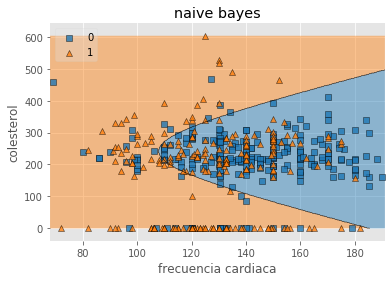

In [36]:
# Loading some example data
x = np.array([train.thalach.values, train.chol.values])
X = x.transpose()
y = train.num.values
#print(X)
#print(y)
#print(train.num.values)

model22 = GaussianNB()
model22.fit(X, y)


# Plotting decision regions
plot_decision_regions(X, y, clf=model22, legend=2)

# Adding axes annotations
plt.xlabel('frecuencia cardiaca')
plt.ylabel('colesterol')
plt.title('naive bayes')
plt.show()


## REDES NEURONALES

A continuacion se mustra el enfoque de redes neuronales. En este enfoque se plantean distintos modelos que nos ayudan a comprender cual seria la mejor solusion

W0916 02:29:24.287500 139670546970432 deprecation.py:506] From /home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0916 02:29:24.687063 139670546970432 deprecation.py:323] From /home/dacer/anaconda3/envs/proyecto/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 365 samples, validate on 92 samples
Epoch 1/1000
365/365 [==============================] - 2s 6ms/sample - loss: 0.6931 - acc: 0.5342 - val_loss: 0.6931 - val_acc: 0.5652
Epoch 2/1000
365/365 [==============================] - 0s 23us/sample - loss: 0.6931 - acc: 0.5342 - val_loss: 0.6930 - val_acc: 0.5652
Epoch 3/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.6931 - acc: 0.5342 - val_loss: 0.6930 - val_acc: 0.5652
Epoch 4/1000
365/365 [==============================] - 0s 24us/sample - loss: 0.6930 - acc: 0.5342 - val_loss: 0.6929 - val_acc: 0.5652
Epoch 5/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.6930 - acc: 0.5342 - val_loss: 0.6928 - val_acc: 0.5652
Epoch 6/1000
365/365 [==============================] - 0s 21us/sample - loss: 0.6930 - acc: 0.5342 - val_loss: 0.6928 - val_acc: 0.5652
Epoch 7/1000
365/365 [==============================] - 0s 36us/sample - loss: 0.6929 - acc: 0.5342 - val_loss: 0.6927 - val_acc: 0.56

Epoch 61/1000
365/365 [==============================] - 0s 35us/sample - loss: 0.6916 - acc: 0.5342 - val_loss: 0.6899 - val_acc: 0.5652
Epoch 62/1000
365/365 [==============================] - 0s 31us/sample - loss: 0.6916 - acc: 0.5342 - val_loss: 0.6898 - val_acc: 0.5652
Epoch 63/1000
365/365 [==============================] - 0s 27us/sample - loss: 0.6916 - acc: 0.5342 - val_loss: 0.6898 - val_acc: 0.5652
Epoch 64/1000
365/365 [==============================] - 0s 33us/sample - loss: 0.6916 - acc: 0.5342 - val_loss: 0.6897 - val_acc: 0.5652
Epoch 65/1000
365/365 [==============================] - 0s 32us/sample - loss: 0.6916 - acc: 0.5342 - val_loss: 0.6897 - val_acc: 0.5652
Epoch 66/1000
365/365 [==============================] - 0s 68us/sample - loss: 0.6915 - acc: 0.5342 - val_loss: 0.6897 - val_acc: 0.5652
Epoch 67/1000
365/365 [==============================] - 0s 49us/sample - loss: 0.6915 - acc: 0.5342 - val_loss: 0.6896 - val_acc: 0.5652
Epoch 68/1000
365/365 [===========

Epoch 121/1000
365/365 [==============================] - 0s 23us/sample - loss: 0.6910 - acc: 0.5342 - val_loss: 0.6880 - val_acc: 0.5652
Epoch 122/1000
365/365 [==============================] - 0s 23us/sample - loss: 0.6910 - acc: 0.5342 - val_loss: 0.6880 - val_acc: 0.5652
Epoch 123/1000
365/365 [==============================] - 0s 43us/sample - loss: 0.6910 - acc: 0.5342 - val_loss: 0.6880 - val_acc: 0.5652
Epoch 124/1000
365/365 [==============================] - 0s 29us/sample - loss: 0.6910 - acc: 0.5342 - val_loss: 0.6879 - val_acc: 0.5652
Epoch 125/1000
365/365 [==============================] - 0s 28us/sample - loss: 0.6910 - acc: 0.5342 - val_loss: 0.6879 - val_acc: 0.5652
Epoch 126/1000
365/365 [==============================] - 0s 32us/sample - loss: 0.6910 - acc: 0.5342 - val_loss: 0.6879 - val_acc: 0.5652
Epoch 127/1000
365/365 [==============================] - 0s 23us/sample - loss: 0.6910 - acc: 0.5342 - val_loss: 0.6879 - val_acc: 0.5652
Epoch 128/1000
365/365 [===

Epoch 180/1000
365/365 [==============================] - 0s 63us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6871 - val_acc: 0.5652
Epoch 181/1000
365/365 [==============================] - 0s 39us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6871 - val_acc: 0.5652
Epoch 182/1000
365/365 [==============================] - 0s 34us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6871 - val_acc: 0.5652
Epoch 183/1000
365/365 [==============================] - 0s 35us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6871 - val_acc: 0.5652
Epoch 184/1000
365/365 [==============================] - 0s 40us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6871 - val_acc: 0.5652
Epoch 185/1000
365/365 [==============================] - 0s 30us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6871 - val_acc: 0.5652
Epoch 186/1000
365/365 [==============================] - 0s 39us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6871 - val_acc: 0.5652
Epoch 187/1000
365/365 [===

Epoch 239/1000
365/365 [==============================] - 0s 38us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6867 - val_acc: 0.5652
Epoch 240/1000
365/365 [==============================] - 0s 33us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6867 - val_acc: 0.5652
Epoch 241/1000
365/365 [==============================] - 0s 43us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6867 - val_acc: 0.5652
Epoch 242/1000
365/365 [==============================] - 0s 34us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6867 - val_acc: 0.5652
Epoch 243/1000
365/365 [==============================] - 0s 37us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6867 - val_acc: 0.5652
Epoch 244/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6867 - val_acc: 0.5652
Epoch 245/1000
365/365 [==============================] - 0s 27us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6867 - val_acc: 0.5652
Epoch 246/1000
365/365 [===

Epoch 298/1000
365/365 [==============================] - 0s 40us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 299/1000
365/365 [==============================] - 0s 37us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 300/1000
365/365 [==============================] - 0s 38us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 301/1000
365/365 [==============================] - 0s 35us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 302/1000
365/365 [==============================] - 0s 21us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 303/1000
365/365 [==============================] - 0s 24us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 304/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 305/1000
365/365 [===

Epoch 357/1000
365/365 [==============================] - 0s 40us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 358/1000
365/365 [==============================] - 0s 36us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 359/1000
365/365 [==============================] - 0s 36us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 360/1000
365/365 [==============================] - 0s 32us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 361/1000
365/365 [==============================] - 0s 33us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 362/1000
365/365 [==============================] - 0s 24us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 363/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 364/1000
365/365 [===

Epoch 416/1000
365/365 [==============================] - 0s 39us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 417/1000
365/365 [==============================] - 0s 35us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 418/1000
365/365 [==============================] - 0s 37us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 419/1000
365/365 [==============================] - 0s 31us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 420/1000
365/365 [==============================] - 0s 37us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 421/1000
365/365 [==============================] - 0s 36us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 422/1000
365/365 [==============================] - 0s 36us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 423/1000
365/365 [===

Epoch 475/1000
365/365 [==============================] - 0s 30us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 476/1000
365/365 [==============================] - 0s 35us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 477/1000
365/365 [==============================] - 0s 35us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 478/1000
365/365 [==============================] - 0s 31us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 479/1000
365/365 [==============================] - 0s 51us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 480/1000
365/365 [==============================] - 0s 44us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 481/1000
365/365 [==============================] - 0s 47us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 482/1000
365/365 [===

Epoch 534/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 535/1000
365/365 [==============================] - 0s 23us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 536/1000
365/365 [==============================] - 0s 29us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 537/1000
365/365 [==============================] - 0s 29us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 538/1000
365/365 [==============================] - 0s 30us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 539/1000
365/365 [==============================] - 0s 21us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 540/1000
365/365 [==============================] - 0s 53us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 541/1000
365/365 [===

Epoch 593/1000
365/365 [==============================] - 0s 27us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 594/1000
365/365 [==============================] - 0s 31us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 595/1000
365/365 [==============================] - 0s 28us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 596/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 597/1000
365/365 [==============================] - 0s 44us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 598/1000
365/365 [==============================] - 0s 30us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 599/1000
365/365 [==============================] - 0s 30us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 600/1000
365/365 [===

Epoch 652/1000
365/365 [==============================] - 0s 39us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 653/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 654/1000
365/365 [==============================] - 0s 20us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 655/1000
365/365 [==============================] - 0s 29us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 656/1000
365/365 [==============================] - 0s 23us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 657/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 658/1000
365/365 [==============================] - 0s 23us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 659/1000
365/365 [===

Epoch 711/1000
365/365 [==============================] - 0s 29us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 712/1000
365/365 [==============================] - 0s 30us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 713/1000
365/365 [==============================] - 0s 42us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 714/1000
365/365 [==============================] - 0s 74us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 715/1000
365/365 [==============================] - 0s 34us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 716/1000
365/365 [==============================] - 0s 23us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 717/1000
365/365 [==============================] - 0s 53us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 718/1000
365/365 [===

Epoch 770/1000
365/365 [==============================] - 0s 21us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 771/1000
365/365 [==============================] - 0s 27us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 772/1000
365/365 [==============================] - 0s 23us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 773/1000
365/365 [==============================] - 0s 20us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 774/1000
365/365 [==============================] - 0s 29us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 775/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 776/1000
365/365 [==============================] - 0s 23us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 777/1000
365/365 [===

Epoch 829/1000
365/365 [==============================] - 0s 36us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 830/1000
365/365 [==============================] - 0s 23us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 831/1000
365/365 [==============================] - 0s 37us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 832/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 833/1000
365/365 [==============================] - 0s 23us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 834/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 835/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 836/1000
365/365 [===

Epoch 888/1000
365/365 [==============================] - 0s 27us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 889/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 890/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 891/1000
365/365 [==============================] - 0s 23us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 892/1000
365/365 [==============================] - 0s 30us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 893/1000
365/365 [==============================] - 0s 30us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 894/1000
365/365 [==============================] - 0s 29us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 895/1000
365/365 [===

Epoch 947/1000
365/365 [==============================] - 0s 35us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 948/1000
365/365 [==============================] - 0s 27us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 949/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 950/1000
365/365 [==============================] - 0s 27us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 951/1000
365/365 [==============================] - 0s 24us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 952/1000
365/365 [==============================] - 0s 28us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 953/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.6908 - acc: 0.5342 - val_loss: 0.6866 - val_acc: 0.5652
Epoch 954/1000
365/365 [===

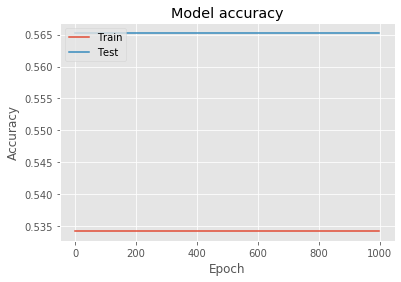

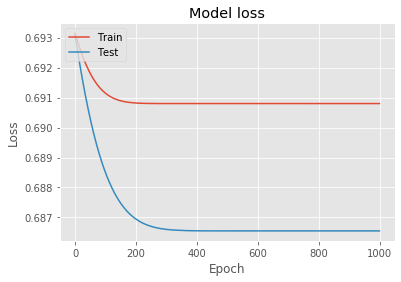

In [37]:
r = 0.2      # learning rate no se usa aqui ya que usaremos pro defecto 0.001
nn = [8, 7, 6,5,4,3,2,1]  # neuronas por capa.



model = kr.Sequential()#Definimos una secuancia de capas

# Añadimos las capas 
# Activacion de la capa oculta Rectified Linear Unit.
# Activación de la capa de salida sigmoid como una S
l1 = model.add(kr.layers.Dense(nn[0], input_dim=8, activation='relu'))
l2 = model.add(kr.layers.Dense(nn[1], activation='relu'))
l3 = model.add(kr.layers.Dense(nn[2], activation='relu'))
l4 = model.add(kr.layers.Dense(nn[3], activation='relu'))
l5 = model.add(kr.layers.Dense(nn[4], activation='relu'))
l6 = model.add(kr.layers.Dense(nn[5], activation='relu'))
l7 = model.add(kr.layers.Dense(nn[6], activation='relu'))
l8 = model.add(kr.layers.Dense(nn[7], activation='sigmoid'))

# Se compila el modelo teniendo en cuanta lo siguiente
# Funcion de coste: binary_crossentropy: calcula considerando el real y la prediccion
# Optimizador: Adam, el cual es una extensión del descenso de gradiente estocástico
# Metrica del rendimiento del modelo: Accuracy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc']) #por defecto lr=0.001

# Se entrena el modelo
history=model.fit(trainX, trainY, epochs=1000,batch_size=1000,validation_data=(testX,testY))
# Evaluamos el modelo
scores = model.evaluate(trainX, trainY)
modeloneacctrain=scores[1]*100
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# evaluamos el modelo con los datos de prueba
scores = model.evaluate(testX, testY)
modeloneacctest=scores[1]*100
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# calcula las predicciones
predictions = model.predict(testX)
# redondeamos las predicciones
rounded = [round(x[0]) for x in predictions]


###Plot de datos del modelo

# valores para accuracy 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# valores para loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()




# Matriz de confusión

In [38]:
y_actu = pd.Series(testY, name='Actual')
y_pred = pd.Series(rounded, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

Predicted  0.0  All
Actual             
0           52   52
1           40   40
All         92   92


#### Analisando el modelo
para este proyecto nos enfocamos en observar que topologia nos daba los mejores resultados. Es por esto que para cada modelo creado de redes neuronales creamos una tabla para observar su comportamiento en distintas ejecuciones

| # ejecución | Train score   | Test Score |
| ------------- | ------------- |----------- |
| 1 | 66.85  | 58.70 |
| 2 | 78.36  | 75.00 |
| 3 | 78.08  | 65.22 |
| 4 | 53.97  | 54.35 |

Train on 365 samples, validate on 92 samples
Epoch 1/1000
365/365 [==============================] - 1s 2ms/sample - loss: 13.9298 - acc: 0.4658 - val_loss: 13.6787 - val_acc: 0.4348
Epoch 2/1000
365/365 [==============================] - 0s 31us/sample - loss: 12.9523 - acc: 0.4658 - val_loss: 12.6780 - val_acc: 0.4348
Epoch 3/1000
365/365 [==============================] - 0s 26us/sample - loss: 11.9867 - acc: 0.4658 - val_loss: 11.6754 - val_acc: 0.4348
Epoch 4/1000
365/365 [==============================] - 0s 17us/sample - loss: 11.0258 - acc: 0.4658 - val_loss: 10.6704 - val_acc: 0.4348
Epoch 5/1000
365/365 [==============================] - 0s 22us/sample - loss: 10.0697 - acc: 0.4658 - val_loss: 9.6629 - val_acc: 0.4348
Epoch 6/1000
365/365 [==============================] - 0s 27us/sample - loss: 9.1128 - acc: 0.4658 - val_loss: 8.6513 - val_acc: 0.4348
Epoch 7/1000
365/365 [==============================] - 0s 24us/sample - loss: 8.1561 - acc: 0.4658 - val_loss: 7.6451 - val_

Epoch 61/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.9589 - acc: 0.5014 - val_loss: 0.7742 - val_acc: 0.5000
Epoch 62/1000
365/365 [==============================] - 0s 54us/sample - loss: 0.9498 - acc: 0.5041 - val_loss: 0.7574 - val_acc: 0.5217
Epoch 63/1000
365/365 [==============================] - 0s 34us/sample - loss: 0.9377 - acc: 0.5068 - val_loss: 0.7391 - val_acc: 0.5217
Epoch 64/1000
365/365 [==============================] - 0s 39us/sample - loss: 0.9259 - acc: 0.5315 - val_loss: 0.7228 - val_acc: 0.5652
Epoch 65/1000
365/365 [==============================] - 0s 34us/sample - loss: 0.9169 - acc: 0.5342 - val_loss: 0.7107 - val_acc: 0.6087
Epoch 66/1000
365/365 [==============================] - 0s 35us/sample - loss: 0.9120 - acc: 0.5342 - val_loss: 0.7028 - val_acc: 0.6196
Epoch 67/1000
365/365 [==============================] - 0s 32us/sample - loss: 0.9108 - acc: 0.5342 - val_loss: 0.6985 - val_acc: 0.6630
Epoch 68/1000
365/365 [===========

Epoch 121/1000
365/365 [==============================] - 0s 19us/sample - loss: 0.7927 - acc: 0.5890 - val_loss: 0.6461 - val_acc: 0.6630
Epoch 122/1000
365/365 [==============================] - 0s 18us/sample - loss: 0.7908 - acc: 0.5890 - val_loss: 0.6452 - val_acc: 0.6848
Epoch 123/1000
365/365 [==============================] - 0s 18us/sample - loss: 0.7889 - acc: 0.5918 - val_loss: 0.6445 - val_acc: 0.6848
Epoch 124/1000
365/365 [==============================] - 0s 18us/sample - loss: 0.7869 - acc: 0.5918 - val_loss: 0.6438 - val_acc: 0.6848
Epoch 125/1000
365/365 [==============================] - 0s 19us/sample - loss: 0.7850 - acc: 0.5973 - val_loss: 0.6431 - val_acc: 0.6848
Epoch 126/1000
365/365 [==============================] - 0s 24us/sample - loss: 0.7834 - acc: 0.6000 - val_loss: 0.6426 - val_acc: 0.6957
Epoch 127/1000
365/365 [==============================] - 0s 44us/sample - loss: 0.7817 - acc: 0.6082 - val_loss: 0.6422 - val_acc: 0.6957
Epoch 128/1000
365/365 [===

Epoch 180/1000
365/365 [==============================] - 0s 38us/sample - loss: 0.7095 - acc: 0.6301 - val_loss: 0.6284 - val_acc: 0.6848
Epoch 181/1000
365/365 [==============================] - 0s 34us/sample - loss: 0.7084 - acc: 0.6301 - val_loss: 0.6284 - val_acc: 0.6848
Epoch 182/1000
365/365 [==============================] - 0s 32us/sample - loss: 0.7073 - acc: 0.6329 - val_loss: 0.6284 - val_acc: 0.6848
Epoch 183/1000
365/365 [==============================] - 0s 48us/sample - loss: 0.7063 - acc: 0.6301 - val_loss: 0.6282 - val_acc: 0.6848
Epoch 184/1000
365/365 [==============================] - 0s 31us/sample - loss: 0.7052 - acc: 0.6301 - val_loss: 0.6279 - val_acc: 0.6848
Epoch 185/1000
365/365 [==============================] - 0s 27us/sample - loss: 0.7042 - acc: 0.6301 - val_loss: 0.6276 - val_acc: 0.6848
Epoch 186/1000
365/365 [==============================] - 0s 48us/sample - loss: 0.7032 - acc: 0.6301 - val_loss: 0.6275 - val_acc: 0.6848
Epoch 187/1000
365/365 [===

Epoch 239/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.6639 - acc: 0.6329 - val_loss: 0.6107 - val_acc: 0.7065
Epoch 240/1000
365/365 [==============================] - 0s 21us/sample - loss: 0.6634 - acc: 0.6329 - val_loss: 0.6104 - val_acc: 0.6957
Epoch 241/1000
365/365 [==============================] - 0s 28us/sample - loss: 0.6630 - acc: 0.6301 - val_loss: 0.6101 - val_acc: 0.6957
Epoch 242/1000
365/365 [==============================] - 0s 17us/sample - loss: 0.6625 - acc: 0.6301 - val_loss: 0.6098 - val_acc: 0.6957
Epoch 243/1000
365/365 [==============================] - 0s 28us/sample - loss: 0.6621 - acc: 0.6329 - val_loss: 0.6094 - val_acc: 0.6957
Epoch 244/1000
365/365 [==============================] - 0s 28us/sample - loss: 0.6616 - acc: 0.6356 - val_loss: 0.6090 - val_acc: 0.6957
Epoch 245/1000
365/365 [==============================] - 0s 31us/sample - loss: 0.6612 - acc: 0.6329 - val_loss: 0.6086 - val_acc: 0.6957
Epoch 246/1000
365/365 [===

Epoch 298/1000
365/365 [==============================] - 0s 29us/sample - loss: 0.6409 - acc: 0.6575 - val_loss: 0.5954 - val_acc: 0.6957
Epoch 299/1000
365/365 [==============================] - 0s 24us/sample - loss: 0.6405 - acc: 0.6575 - val_loss: 0.5951 - val_acc: 0.6957
Epoch 300/1000
365/365 [==============================] - 0s 20us/sample - loss: 0.6402 - acc: 0.6575 - val_loss: 0.5947 - val_acc: 0.6957
Epoch 301/1000
365/365 [==============================] - 0s 16us/sample - loss: 0.6399 - acc: 0.6575 - val_loss: 0.5944 - val_acc: 0.6957
Epoch 302/1000
365/365 [==============================] - 0s 32us/sample - loss: 0.6396 - acc: 0.6548 - val_loss: 0.5941 - val_acc: 0.6957
Epoch 303/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.6392 - acc: 0.6548 - val_loss: 0.5938 - val_acc: 0.6957
Epoch 304/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.6389 - acc: 0.6548 - val_loss: 0.5936 - val_acc: 0.6957
Epoch 305/1000
365/365 [===

Epoch 357/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.6221 - acc: 0.6630 - val_loss: 0.5668 - val_acc: 0.7717
Epoch 358/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.6216 - acc: 0.6630 - val_loss: 0.5657 - val_acc: 0.7717
Epoch 359/1000
365/365 [==============================] - 0s 21us/sample - loss: 0.6211 - acc: 0.6603 - val_loss: 0.5646 - val_acc: 0.7717
Epoch 360/1000
365/365 [==============================] - 0s 20us/sample - loss: 0.6207 - acc: 0.6603 - val_loss: 0.5638 - val_acc: 0.7717
Epoch 361/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.6202 - acc: 0.6630 - val_loss: 0.5633 - val_acc: 0.7717
Epoch 362/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.6199 - acc: 0.6603 - val_loss: 0.5631 - val_acc: 0.7717
Epoch 363/1000
365/365 [==============================] - 0s 31us/sample - loss: 0.6196 - acc: 0.6603 - val_loss: 0.5628 - val_acc: 0.7609
Epoch 364/1000
365/365 [===

Epoch 416/1000
365/365 [==============================] - 0s 23us/sample - loss: 0.6033 - acc: 0.6877 - val_loss: 0.5507 - val_acc: 0.7717
Epoch 417/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.6030 - acc: 0.6877 - val_loss: 0.5503 - val_acc: 0.7717
Epoch 418/1000
365/365 [==============================] - 0s 27us/sample - loss: 0.6027 - acc: 0.6877 - val_loss: 0.5499 - val_acc: 0.7717
Epoch 419/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.6025 - acc: 0.6877 - val_loss: 0.5496 - val_acc: 0.7717
Epoch 420/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.6022 - acc: 0.6849 - val_loss: 0.5495 - val_acc: 0.7717
Epoch 421/1000
365/365 [==============================] - 0s 21us/sample - loss: 0.6019 - acc: 0.6849 - val_loss: 0.5494 - val_acc: 0.7717
Epoch 422/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.6016 - acc: 0.6849 - val_loss: 0.5492 - val_acc: 0.7717
Epoch 423/1000
365/365 [===

Epoch 475/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.5880 - acc: 0.6877 - val_loss: 0.5361 - val_acc: 0.7826
Epoch 476/1000
365/365 [==============================] - 0s 24us/sample - loss: 0.5878 - acc: 0.6877 - val_loss: 0.5360 - val_acc: 0.7826
Epoch 477/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.5876 - acc: 0.6877 - val_loss: 0.5359 - val_acc: 0.7826
Epoch 478/1000
365/365 [==============================] - 0s 21us/sample - loss: 0.5873 - acc: 0.6877 - val_loss: 0.5358 - val_acc: 0.7826
Epoch 479/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.5871 - acc: 0.6904 - val_loss: 0.5356 - val_acc: 0.7826
Epoch 480/1000
365/365 [==============================] - 0s 20us/sample - loss: 0.5869 - acc: 0.6904 - val_loss: 0.5353 - val_acc: 0.7826
Epoch 481/1000
365/365 [==============================] - 0s 20us/sample - loss: 0.5866 - acc: 0.6904 - val_loss: 0.5350 - val_acc: 0.7826
Epoch 482/1000
365/365 [===

Epoch 534/1000
365/365 [==============================] - 0s 17us/sample - loss: 0.5728 - acc: 0.7041 - val_loss: 0.5216 - val_acc: 0.8152
Epoch 535/1000
365/365 [==============================] - 0s 23us/sample - loss: 0.5725 - acc: 0.7041 - val_loss: 0.5211 - val_acc: 0.8152
Epoch 536/1000
365/365 [==============================] - 0s 18us/sample - loss: 0.5722 - acc: 0.7041 - val_loss: 0.5205 - val_acc: 0.8152
Epoch 537/1000
365/365 [==============================] - 0s 19us/sample - loss: 0.5719 - acc: 0.7041 - val_loss: 0.5199 - val_acc: 0.8152
Epoch 538/1000
365/365 [==============================] - 0s 19us/sample - loss: 0.5716 - acc: 0.7041 - val_loss: 0.5194 - val_acc: 0.8152
Epoch 539/1000
365/365 [==============================] - 0s 59us/sample - loss: 0.5713 - acc: 0.7068 - val_loss: 0.5191 - val_acc: 0.8152
Epoch 540/1000
365/365 [==============================] - 0s 46us/sample - loss: 0.5710 - acc: 0.7041 - val_loss: 0.5193 - val_acc: 0.8152
Epoch 541/1000
365/365 [===

Epoch 593/1000
365/365 [==============================] - 0s 24us/sample - loss: 0.5565 - acc: 0.7205 - val_loss: 0.5079 - val_acc: 0.8152
Epoch 594/1000
365/365 [==============================] - 0s 20us/sample - loss: 0.5563 - acc: 0.7233 - val_loss: 0.5077 - val_acc: 0.8261
Epoch 595/1000
365/365 [==============================] - 0s 24us/sample - loss: 0.5560 - acc: 0.7233 - val_loss: 0.5073 - val_acc: 0.8261
Epoch 596/1000
365/365 [==============================] - 0s 18us/sample - loss: 0.5558 - acc: 0.7233 - val_loss: 0.5069 - val_acc: 0.8261
Epoch 597/1000
365/365 [==============================] - 0s 16us/sample - loss: 0.5555 - acc: 0.7233 - val_loss: 0.5066 - val_acc: 0.8261
Epoch 598/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.5553 - acc: 0.7233 - val_loss: 0.5061 - val_acc: 0.8261
Epoch 599/1000
365/365 [==============================] - 0s 18us/sample - loss: 0.5550 - acc: 0.7233 - val_loss: 0.5056 - val_acc: 0.8261
Epoch 600/1000
365/365 [===

Epoch 652/1000
365/365 [==============================] - 0s 29us/sample - loss: 0.5419 - acc: 0.7288 - val_loss: 0.4948 - val_acc: 0.8370
Epoch 653/1000
365/365 [==============================] - 0s 18us/sample - loss: 0.5416 - acc: 0.7288 - val_loss: 0.4948 - val_acc: 0.8370
Epoch 654/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.5414 - acc: 0.7315 - val_loss: 0.4948 - val_acc: 0.8370
Epoch 655/1000
365/365 [==============================] - 0s 24us/sample - loss: 0.5412 - acc: 0.7315 - val_loss: 0.4945 - val_acc: 0.8370
Epoch 656/1000
365/365 [==============================] - 0s 17us/sample - loss: 0.5409 - acc: 0.7288 - val_loss: 0.4941 - val_acc: 0.8370
Epoch 657/1000
365/365 [==============================] - 0s 23us/sample - loss: 0.5406 - acc: 0.7315 - val_loss: 0.4936 - val_acc: 0.8370
Epoch 658/1000
365/365 [==============================] - 0s 23us/sample - loss: 0.5404 - acc: 0.7288 - val_loss: 0.4931 - val_acc: 0.8370
Epoch 659/1000
365/365 [===

Epoch 711/1000
365/365 [==============================] - 0s 17us/sample - loss: 0.5274 - acc: 0.7479 - val_loss: 0.4792 - val_acc: 0.8478
Epoch 712/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.5272 - acc: 0.7479 - val_loss: 0.4789 - val_acc: 0.8478
Epoch 713/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.5270 - acc: 0.7479 - val_loss: 0.4786 - val_acc: 0.8587
Epoch 714/1000
365/365 [==============================] - 0s 21us/sample - loss: 0.5267 - acc: 0.7479 - val_loss: 0.4782 - val_acc: 0.8587
Epoch 715/1000
365/365 [==============================] - 0s 24us/sample - loss: 0.5265 - acc: 0.7479 - val_loss: 0.4779 - val_acc: 0.8478
Epoch 716/1000
365/365 [==============================] - 0s 38us/sample - loss: 0.5263 - acc: 0.7479 - val_loss: 0.4777 - val_acc: 0.8478
Epoch 717/1000
365/365 [==============================] - 0s 29us/sample - loss: 0.5260 - acc: 0.7479 - val_loss: 0.4774 - val_acc: 0.8478
Epoch 718/1000
365/365 [===

Epoch 770/1000
365/365 [==============================] - 0s 18us/sample - loss: 0.5146 - acc: 0.7562 - val_loss: 0.4671 - val_acc: 0.8370
Epoch 771/1000
365/365 [==============================] - 0s 16us/sample - loss: 0.5144 - acc: 0.7562 - val_loss: 0.4669 - val_acc: 0.8370
Epoch 772/1000
365/365 [==============================] - 0s 46us/sample - loss: 0.5142 - acc: 0.7562 - val_loss: 0.4665 - val_acc: 0.8370
Epoch 773/1000
365/365 [==============================] - 0s 40us/sample - loss: 0.5140 - acc: 0.7562 - val_loss: 0.4665 - val_acc: 0.8370
Epoch 774/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.5137 - acc: 0.7562 - val_loss: 0.4665 - val_acc: 0.8370
Epoch 775/1000
365/365 [==============================] - 0s 19us/sample - loss: 0.5135 - acc: 0.7562 - val_loss: 0.4661 - val_acc: 0.8370
Epoch 776/1000
365/365 [==============================] - 0s 18us/sample - loss: 0.5133 - acc: 0.7534 - val_loss: 0.4658 - val_acc: 0.8370
Epoch 777/1000
365/365 [===

Epoch 829/1000
365/365 [==============================] - 0s 32us/sample - loss: 0.5046 - acc: 0.7534 - val_loss: 0.4599 - val_acc: 0.8370
Epoch 830/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.5045 - acc: 0.7534 - val_loss: 0.4602 - val_acc: 0.8370
Epoch 831/1000
365/365 [==============================] - 0s 28us/sample - loss: 0.5044 - acc: 0.7562 - val_loss: 0.4593 - val_acc: 0.8370
Epoch 832/1000
365/365 [==============================] - 0s 28us/sample - loss: 0.5042 - acc: 0.7562 - val_loss: 0.4600 - val_acc: 0.8370
Epoch 833/1000
365/365 [==============================] - 0s 24us/sample - loss: 0.5041 - acc: 0.7562 - val_loss: 0.4598 - val_acc: 0.8370
Epoch 834/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.5040 - acc: 0.7534 - val_loss: 0.4593 - val_acc: 0.8370
Epoch 835/1000
365/365 [==============================] - 0s 21us/sample - loss: 0.5038 - acc: 0.7562 - val_loss: 0.4595 - val_acc: 0.8370
Epoch 836/1000
365/365 [===

Epoch 888/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.4984 - acc: 0.7671 - val_loss: 0.4553 - val_acc: 0.8370
Epoch 889/1000
365/365 [==============================] - 0s 24us/sample - loss: 0.4983 - acc: 0.7616 - val_loss: 0.4561 - val_acc: 0.8370
Epoch 890/1000
365/365 [==============================] - 0s 17us/sample - loss: 0.4982 - acc: 0.7671 - val_loss: 0.4559 - val_acc: 0.8370
Epoch 891/1000
365/365 [==============================] - 0s 19us/sample - loss: 0.4981 - acc: 0.7671 - val_loss: 0.4553 - val_acc: 0.8370
Epoch 892/1000
365/365 [==============================] - 0s 19us/sample - loss: 0.4980 - acc: 0.7616 - val_loss: 0.4558 - val_acc: 0.8370
Epoch 893/1000
365/365 [==============================] - 0s 24us/sample - loss: 0.4980 - acc: 0.7671 - val_loss: 0.4557 - val_acc: 0.8370
Epoch 894/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.4979 - acc: 0.7671 - val_loss: 0.4551 - val_acc: 0.8370
Epoch 895/1000
365/365 [===

Epoch 947/1000
365/365 [==============================] - 0s 19us/sample - loss: 0.4946 - acc: 0.7644 - val_loss: 0.4541 - val_acc: 0.8370
Epoch 948/1000
365/365 [==============================] - 0s 20us/sample - loss: 0.4946 - acc: 0.7644 - val_loss: 0.4541 - val_acc: 0.8370
Epoch 949/1000
365/365 [==============================] - 0s 18us/sample - loss: 0.4945 - acc: 0.7644 - val_loss: 0.4540 - val_acc: 0.8370
Epoch 950/1000
365/365 [==============================] - 0s 40us/sample - loss: 0.4945 - acc: 0.7644 - val_loss: 0.4542 - val_acc: 0.8370
Epoch 951/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.4945 - acc: 0.7644 - val_loss: 0.4538 - val_acc: 0.8370
Epoch 952/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.4944 - acc: 0.7644 - val_loss: 0.4540 - val_acc: 0.8370
Epoch 953/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.4944 - acc: 0.7644 - val_loss: 0.4541 - val_acc: 0.8370
Epoch 954/1000
365/365 [===

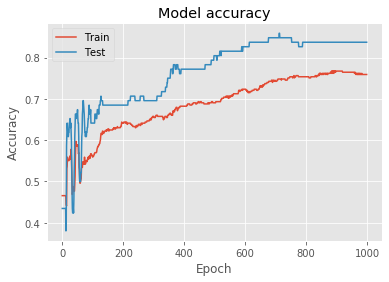

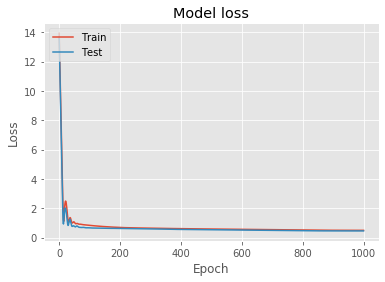

In [39]:
lr = 0.001     # learning rate no se usa aqui ya que usaremos pro defecto 0.001
nn = [12, 12, 12,1]  # neuronas por capa.



model = kr.Sequential() #Definimos una secuancia de capas

# Añadimos las capas
l1 = model.add(kr.layers.Dense(nn[0], input_dim=8, activation='relu'))
l2 = model.add(kr.layers.Dense(nn[1], activation='relu'))
l3 = model.add(kr.layers.Dense(nn[2], activation='relu'))
l4 = model.add(kr.layers.Dense(nn[3], activation='sigmoid'))


# Se compila el modelo teniendo en cuanta lo siguiente
# Funcion de coste: binary_crossentropy: calcula considerando el real y la prediccion
# Optimizador: Adam, el cual es una extensión del descenso de gradiente estocástico
# Metrica del rendimiento del modelo: Accuracy
model.compile(loss='binary_crossentropy', optimizer=kr.optimizers.Adam(lr=lr), metrics=['accuracy'])

# Y entrenamos al modelo. Los callbacks 
history = model.fit(trainX, trainY, epochs=1000,batch_size=1000,verbose=1,validation_data=(testX,testY))
# evaluamos el modelo
scores = model.evaluate(trainX, trainY)
modeltwoacctrain=scores[1]*100
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# evaluamos el modelo para datos de purba
scores = model.evaluate(testX, testY)

modeltwoacctest= scores[1]*100
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

#history = model.fit(testX, testY, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# calcula las predicciones
predictions = model.predict(testX)
# redondeamos las predicciones
rounded = [round(x[0]) for x in predictions]

###Plot de datos del modelo


# valores para accuracy 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# valores para loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


#plot_model(model, to_file='model2.png')

# Matriz de confusión

In [40]:
y_actu = pd.Series(testY, name='Actual')
y_pred = pd.Series(rounded, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

Predicted  0.0  1.0  All
Actual                  
0           42   10   52
1            5   35   40
All         47   45   92


### modelo 2
Este modelo se enfoca en tener las mismas neuronas en cada capa

| # ejecución | Train score   | Test Score |
| ------------- | ------------- |----------- |
| 1 | 76.99 | 66.30 |
| 2 | 78.36  | 67.39 |
| 3 | 72.33  | 58.70 |
| 4 | 77.26  | 67.39 |

### Un modelo sobrenetrenado
A continuación observamos un modelo que se sobre entrena

Train on 365 samples, validate on 92 samples
Epoch 1/1000
365/365 [==============================] - 1s 2ms/sample - loss: 0.1402 - acc: 0.4027 - val_loss: 0.1407 - val_acc: 0.3587
Epoch 2/1000
365/365 [==============================] - 0s 50us/sample - loss: 0.1342 - acc: 0.4082 - val_loss: 0.1357 - val_acc: 0.3478
Epoch 3/1000
365/365 [==============================] - 0s 23us/sample - loss: 0.1304 - acc: 0.4027 - val_loss: 0.1311 - val_acc: 0.3370
Epoch 4/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.1281 - acc: 0.4082 - val_loss: 0.1281 - val_acc: 0.3370
Epoch 5/1000
365/365 [==============================] - 0s 21us/sample - loss: 0.1262 - acc: 0.4027 - val_loss: 0.1260 - val_acc: 0.3478
Epoch 6/1000
365/365 [==============================] - 0s 21us/sample - loss: 0.1243 - acc: 0.4000 - val_loss: 0.1243 - val_acc: 0.3478
Epoch 7/1000
365/365 [==============================] - 0s 21us/sample - loss: 0.1229 - acc: 0.3973 - val_loss: 0.1231 - val_acc: 0.34

Epoch 61/1000
365/365 [==============================] - 0s 43us/sample - loss: 0.1119 - acc: 0.6164 - val_loss: 0.1038 - val_acc: 0.6957
Epoch 62/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.1118 - acc: 0.6164 - val_loss: 0.1038 - val_acc: 0.6957
Epoch 63/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.1118 - acc: 0.6164 - val_loss: 0.1037 - val_acc: 0.6957
Epoch 64/1000
365/365 [==============================] - 0s 28us/sample - loss: 0.1118 - acc: 0.6164 - val_loss: 0.1036 - val_acc: 0.6957
Epoch 65/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.1117 - acc: 0.6164 - val_loss: 0.1035 - val_acc: 0.6957
Epoch 66/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.1117 - acc: 0.6164 - val_loss: 0.1034 - val_acc: 0.6957
Epoch 67/1000
365/365 [==============================] - 0s 30us/sample - loss: 0.1116 - acc: 0.6164 - val_loss: 0.1032 - val_acc: 0.6957
Epoch 68/1000
365/365 [===========

Epoch 121/1000
365/365 [==============================] - 0s 27us/sample - loss: 0.1105 - acc: 0.6164 - val_loss: 0.1012 - val_acc: 0.6957
Epoch 122/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.1105 - acc: 0.6164 - val_loss: 0.1012 - val_acc: 0.6957
Epoch 123/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.1104 - acc: 0.6164 - val_loss: 0.1012 - val_acc: 0.6957
Epoch 124/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.1104 - acc: 0.6164 - val_loss: 0.1012 - val_acc: 0.6957
Epoch 125/1000
365/365 [==============================] - 0s 28us/sample - loss: 0.1104 - acc: 0.6164 - val_loss: 0.1012 - val_acc: 0.6957
Epoch 126/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.1104 - acc: 0.6164 - val_loss: 0.1012 - val_acc: 0.6957
Epoch 127/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.1103 - acc: 0.6164 - val_loss: 0.1011 - val_acc: 0.6957
Epoch 128/1000
365/365 [===

Epoch 180/1000
365/365 [==============================] - 0s 29us/sample - loss: 0.1072 - acc: 0.6438 - val_loss: 0.0983 - val_acc: 0.7174
Epoch 181/1000
365/365 [==============================] - 0s 27us/sample - loss: 0.1072 - acc: 0.6493 - val_loss: 0.0982 - val_acc: 0.7283
Epoch 182/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.1071 - acc: 0.6521 - val_loss: 0.0981 - val_acc: 0.7283
Epoch 183/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.1070 - acc: 0.6521 - val_loss: 0.0980 - val_acc: 0.7283
Epoch 184/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.1069 - acc: 0.6438 - val_loss: 0.0978 - val_acc: 0.7283
Epoch 185/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.1068 - acc: 0.6438 - val_loss: 0.0977 - val_acc: 0.7391
Epoch 186/1000
365/365 [==============================] - 0s 24us/sample - loss: 0.1067 - acc: 0.6438 - val_loss: 0.0976 - val_acc: 0.7391
Epoch 187/1000
365/365 [===

Epoch 239/1000
365/365 [==============================] - 0s 45us/sample - loss: 0.1006 - acc: 0.6822 - val_loss: 0.0904 - val_acc: 0.7391
Epoch 240/1000
365/365 [==============================] - 0s 44us/sample - loss: 0.1005 - acc: 0.6849 - val_loss: 0.0903 - val_acc: 0.7391
Epoch 241/1000
365/365 [==============================] - 0s 39us/sample - loss: 0.1004 - acc: 0.6849 - val_loss: 0.0902 - val_acc: 0.7391
Epoch 242/1000
365/365 [==============================] - 0s 73us/sample - loss: 0.1002 - acc: 0.6849 - val_loss: 0.0900 - val_acc: 0.7391
Epoch 243/1000
365/365 [==============================] - 0s 33us/sample - loss: 0.1001 - acc: 0.6849 - val_loss: 0.0898 - val_acc: 0.7391
Epoch 244/1000
365/365 [==============================] - 0s 35us/sample - loss: 0.0999 - acc: 0.6849 - val_loss: 0.0897 - val_acc: 0.7500
Epoch 245/1000
365/365 [==============================] - 0s 43us/sample - loss: 0.0998 - acc: 0.6822 - val_loss: 0.0896 - val_acc: 0.7500
Epoch 246/1000
365/365 [===

Epoch 298/1000
365/365 [==============================] - 0s 37us/sample - loss: 0.0953 - acc: 0.6849 - val_loss: 0.0873 - val_acc: 0.6957
Epoch 299/1000
365/365 [==============================] - 0s 38us/sample - loss: 0.0952 - acc: 0.6877 - val_loss: 0.0874 - val_acc: 0.6957
Epoch 300/1000
365/365 [==============================] - 0s 32us/sample - loss: 0.0951 - acc: 0.6877 - val_loss: 0.0874 - val_acc: 0.6957
Epoch 301/1000
365/365 [==============================] - 0s 39us/sample - loss: 0.0951 - acc: 0.6877 - val_loss: 0.0873 - val_acc: 0.6957
Epoch 302/1000
365/365 [==============================] - 0s 33us/sample - loss: 0.0950 - acc: 0.6877 - val_loss: 0.0872 - val_acc: 0.7065
Epoch 303/1000
365/365 [==============================] - 0s 38us/sample - loss: 0.0949 - acc: 0.6877 - val_loss: 0.0871 - val_acc: 0.7065
Epoch 304/1000
365/365 [==============================] - 0s 29us/sample - loss: 0.0949 - acc: 0.6877 - val_loss: 0.0872 - val_acc: 0.6957
Epoch 305/1000
365/365 [===

Epoch 357/1000
365/365 [==============================] - 0s 35us/sample - loss: 0.0908 - acc: 0.7041 - val_loss: 0.0867 - val_acc: 0.6957
Epoch 358/1000
365/365 [==============================] - 0s 29us/sample - loss: 0.0907 - acc: 0.7041 - val_loss: 0.0867 - val_acc: 0.6957
Epoch 359/1000
365/365 [==============================] - 0s 35us/sample - loss: 0.0907 - acc: 0.7041 - val_loss: 0.0864 - val_acc: 0.6957
Epoch 360/1000
365/365 [==============================] - 0s 34us/sample - loss: 0.0905 - acc: 0.7041 - val_loss: 0.0863 - val_acc: 0.6957
Epoch 361/1000
365/365 [==============================] - 0s 32us/sample - loss: 0.0904 - acc: 0.7041 - val_loss: 0.0865 - val_acc: 0.6957
Epoch 362/1000
365/365 [==============================] - 0s 35us/sample - loss: 0.0904 - acc: 0.7096 - val_loss: 0.0863 - val_acc: 0.6957
Epoch 363/1000
365/365 [==============================] - 0s 30us/sample - loss: 0.0902 - acc: 0.7068 - val_loss: 0.0863 - val_acc: 0.6957
Epoch 364/1000
365/365 [===

Epoch 416/1000
365/365 [==============================] - 0s 53us/sample - loss: 0.0833 - acc: 0.7507 - val_loss: 0.0823 - val_acc: 0.7174
Epoch 417/1000
365/365 [==============================] - 0s 28us/sample - loss: 0.0831 - acc: 0.7479 - val_loss: 0.0824 - val_acc: 0.7283
Epoch 418/1000
365/365 [==============================] - 0s 30us/sample - loss: 0.0829 - acc: 0.7479 - val_loss: 0.0822 - val_acc: 0.7391
Epoch 419/1000
365/365 [==============================] - 0s 38us/sample - loss: 0.0827 - acc: 0.7425 - val_loss: 0.0817 - val_acc: 0.7500
Epoch 420/1000
365/365 [==============================] - 0s 35us/sample - loss: 0.0825 - acc: 0.7507 - val_loss: 0.0821 - val_acc: 0.7391
Epoch 421/1000
365/365 [==============================] - 0s 40us/sample - loss: 0.0822 - acc: 0.7425 - val_loss: 0.0821 - val_acc: 0.7391
Epoch 422/1000
365/365 [==============================] - 0s 35us/sample - loss: 0.0819 - acc: 0.7452 - val_loss: 0.0818 - val_acc: 0.7500
Epoch 423/1000
365/365 [===

Epoch 475/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.0684 - acc: 0.7808 - val_loss: 0.0756 - val_acc: 0.7826
Epoch 476/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.0683 - acc: 0.7890 - val_loss: 0.0766 - val_acc: 0.7935
Epoch 477/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.0680 - acc: 0.7808 - val_loss: 0.0770 - val_acc: 0.7826
Epoch 478/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.0679 - acc: 0.7973 - val_loss: 0.0779 - val_acc: 0.7826
Epoch 479/1000
365/365 [==============================] - 0s 30us/sample - loss: 0.0675 - acc: 0.7890 - val_loss: 0.0780 - val_acc: 0.7826
Epoch 480/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.0673 - acc: 0.7918 - val_loss: 0.0783 - val_acc: 0.7935
Epoch 481/1000
365/365 [==============================] - 0s 28us/sample - loss: 0.0674 - acc: 0.7890 - val_loss: 0.0781 - val_acc: 0.7826
Epoch 482/1000
365/365 [===

Epoch 534/1000
365/365 [==============================] - 0s 27us/sample - loss: 0.0625 - acc: 0.8082 - val_loss: 0.0781 - val_acc: 0.7826
Epoch 535/1000
365/365 [==============================] - 0s 90us/sample - loss: 0.0624 - acc: 0.8164 - val_loss: 0.0785 - val_acc: 0.7826
Epoch 536/1000
365/365 [==============================] - 0s 35us/sample - loss: 0.0623 - acc: 0.8110 - val_loss: 0.0783 - val_acc: 0.7826
Epoch 537/1000
365/365 [==============================] - 0s 33us/sample - loss: 0.0622 - acc: 0.8137 - val_loss: 0.0785 - val_acc: 0.7717
Epoch 538/1000
365/365 [==============================] - 0s 27us/sample - loss: 0.0622 - acc: 0.8137 - val_loss: 0.0791 - val_acc: 0.7826
Epoch 539/1000
365/365 [==============================] - 0s 29us/sample - loss: 0.0622 - acc: 0.8110 - val_loss: 0.0786 - val_acc: 0.8043
Epoch 540/1000
365/365 [==============================] - 0s 53us/sample - loss: 0.0623 - acc: 0.8137 - val_loss: 0.0805 - val_acc: 0.7826
Epoch 541/1000
365/365 [===

Epoch 593/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.0609 - acc: 0.8137 - val_loss: 0.0773 - val_acc: 0.7826
Epoch 594/1000
365/365 [==============================] - 0s 27us/sample - loss: 0.0608 - acc: 0.8192 - val_loss: 0.0787 - val_acc: 0.7717
Epoch 595/1000
365/365 [==============================] - 0s 94us/sample - loss: 0.0609 - acc: 0.8219 - val_loss: 0.0784 - val_acc: 0.7826
Epoch 596/1000
365/365 [==============================] - 0s 58us/sample - loss: 0.0605 - acc: 0.8192 - val_loss: 0.0787 - val_acc: 0.7717
Epoch 597/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.0607 - acc: 0.8137 - val_loss: 0.0795 - val_acc: 0.7935
Epoch 598/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.0605 - acc: 0.8137 - val_loss: 0.0807 - val_acc: 0.7935
Epoch 599/1000
365/365 [==============================] - 0s 24us/sample - loss: 0.0606 - acc: 0.8192 - val_loss: 0.0800 - val_acc: 0.7717
Epoch 600/1000
365/365 [===

Epoch 652/1000
365/365 [==============================] - 0s 27us/sample - loss: 0.0592 - acc: 0.8274 - val_loss: 0.0776 - val_acc: 0.7935
Epoch 653/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.0592 - acc: 0.8274 - val_loss: 0.0773 - val_acc: 0.7935
Epoch 654/1000
365/365 [==============================] - 0s 23us/sample - loss: 0.0592 - acc: 0.8247 - val_loss: 0.0775 - val_acc: 0.7935
Epoch 655/1000
365/365 [==============================] - 0s 24us/sample - loss: 0.0592 - acc: 0.8247 - val_loss: 0.0774 - val_acc: 0.7935
Epoch 656/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.0591 - acc: 0.8247 - val_loss: 0.0773 - val_acc: 0.7935
Epoch 657/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.0591 - acc: 0.8247 - val_loss: 0.0777 - val_acc: 0.7935
Epoch 658/1000
365/365 [==============================] - 0s 27us/sample - loss: 0.0591 - acc: 0.8247 - val_loss: 0.0771 - val_acc: 0.7935
Epoch 659/1000
365/365 [===

Epoch 711/1000
365/365 [==============================] - 0s 49us/sample - loss: 0.0584 - acc: 0.8247 - val_loss: 0.0771 - val_acc: 0.8043
Epoch 712/1000
365/365 [==============================] - 0s 23us/sample - loss: 0.0583 - acc: 0.8301 - val_loss: 0.0776 - val_acc: 0.7935
Epoch 713/1000
365/365 [==============================] - 0s 28us/sample - loss: 0.0584 - acc: 0.8301 - val_loss: 0.0770 - val_acc: 0.7935
Epoch 714/1000
365/365 [==============================] - 0s 28us/sample - loss: 0.0584 - acc: 0.8247 - val_loss: 0.0771 - val_acc: 0.7935
Epoch 715/1000
365/365 [==============================] - 0s 24us/sample - loss: 0.0583 - acc: 0.8247 - val_loss: 0.0776 - val_acc: 0.7935
Epoch 716/1000
365/365 [==============================] - 0s 27us/sample - loss: 0.0583 - acc: 0.8301 - val_loss: 0.0774 - val_acc: 0.7935
Epoch 717/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.0583 - acc: 0.8301 - val_loss: 0.0773 - val_acc: 0.8043
Epoch 718/1000
365/365 [===

Epoch 770/1000
365/365 [==============================] - 0s 74us/sample - loss: 0.0580 - acc: 0.8329 - val_loss: 0.0779 - val_acc: 0.7717
Epoch 771/1000
365/365 [==============================] - 0s 30us/sample - loss: 0.0577 - acc: 0.8329 - val_loss: 0.0772 - val_acc: 0.7609
Epoch 772/1000
365/365 [==============================] - 0s 42us/sample - loss: 0.0582 - acc: 0.8192 - val_loss: 0.0776 - val_acc: 0.7935
Epoch 773/1000
365/365 [==============================] - 0s 30us/sample - loss: 0.0577 - acc: 0.8301 - val_loss: 0.0782 - val_acc: 0.7826
Epoch 774/1000
365/365 [==============================] - 0s 53us/sample - loss: 0.0580 - acc: 0.8301 - val_loss: 0.0774 - val_acc: 0.7826
Epoch 775/1000
365/365 [==============================] - 0s 43us/sample - loss: 0.0576 - acc: 0.8274 - val_loss: 0.0770 - val_acc: 0.7826
Epoch 776/1000
365/365 [==============================] - 0s 24us/sample - loss: 0.0579 - acc: 0.8219 - val_loss: 0.0777 - val_acc: 0.7717
Epoch 777/1000
365/365 [===

Epoch 829/1000
365/365 [==============================] - 0s 29us/sample - loss: 0.0568 - acc: 0.8301 - val_loss: 0.0771 - val_acc: 0.7935
Epoch 830/1000
365/365 [==============================] - 0s 52us/sample - loss: 0.0568 - acc: 0.8301 - val_loss: 0.0770 - val_acc: 0.7935
Epoch 831/1000
365/365 [==============================] - 0s 53us/sample - loss: 0.0568 - acc: 0.8274 - val_loss: 0.0770 - val_acc: 0.7826
Epoch 832/1000
365/365 [==============================] - 0s 44us/sample - loss: 0.0568 - acc: 0.8274 - val_loss: 0.0770 - val_acc: 0.7826
Epoch 833/1000
365/365 [==============================] - 0s 60us/sample - loss: 0.0568 - acc: 0.8301 - val_loss: 0.0768 - val_acc: 0.7935
Epoch 834/1000
365/365 [==============================] - 0s 30us/sample - loss: 0.0568 - acc: 0.8274 - val_loss: 0.0770 - val_acc: 0.7935
Epoch 835/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.0567 - acc: 0.8274 - val_loss: 0.0775 - val_acc: 0.7717
Epoch 836/1000
365/365 [===

Epoch 888/1000
365/365 [==============================] - 0s 33us/sample - loss: 0.0562 - acc: 0.8274 - val_loss: 0.0774 - val_acc: 0.7717
Epoch 889/1000
365/365 [==============================] - 0s 23us/sample - loss: 0.0561 - acc: 0.8301 - val_loss: 0.0760 - val_acc: 0.7717
Epoch 890/1000
365/365 [==============================] - 0s 58us/sample - loss: 0.0562 - acc: 0.8411 - val_loss: 0.0778 - val_acc: 0.7609
Epoch 891/1000
365/365 [==============================] - 0s 29us/sample - loss: 0.0561 - acc: 0.8329 - val_loss: 0.0779 - val_acc: 0.7609
Epoch 892/1000
365/365 [==============================] - 0s 35us/sample - loss: 0.0560 - acc: 0.8384 - val_loss: 0.0778 - val_acc: 0.7717
Epoch 893/1000
365/365 [==============================] - 0s 65us/sample - loss: 0.0560 - acc: 0.8356 - val_loss: 0.0773 - val_acc: 0.7826
Epoch 894/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.0561 - acc: 0.8301 - val_loss: 0.0778 - val_acc: 0.7717
Epoch 895/1000
365/365 [===

Epoch 947/1000
365/365 [==============================] - 0s 50us/sample - loss: 0.0548 - acc: 0.8466 - val_loss: 0.0782 - val_acc: 0.7717
Epoch 948/1000
365/365 [==============================] - 0s 38us/sample - loss: 0.0548 - acc: 0.8466 - val_loss: 0.0782 - val_acc: 0.7717
Epoch 949/1000
365/365 [==============================] - 0s 65us/sample - loss: 0.0547 - acc: 0.8438 - val_loss: 0.0781 - val_acc: 0.7717
Epoch 950/1000
365/365 [==============================] - 0s 32us/sample - loss: 0.0547 - acc: 0.8411 - val_loss: 0.0785 - val_acc: 0.7717
Epoch 951/1000
365/365 [==============================] - 0s 29us/sample - loss: 0.0547 - acc: 0.8438 - val_loss: 0.0785 - val_acc: 0.7717
Epoch 952/1000
365/365 [==============================] - 0s 48us/sample - loss: 0.0547 - acc: 0.8384 - val_loss: 0.0795 - val_acc: 0.7609
Epoch 953/1000
365/365 [==============================] - 0s 37us/sample - loss: 0.0548 - acc: 0.8548 - val_loss: 0.0789 - val_acc: 0.7717
Epoch 954/1000
365/365 [===

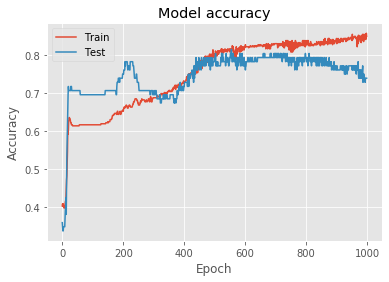

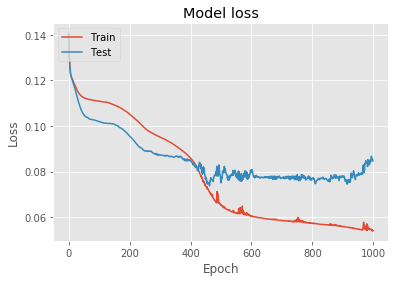

In [41]:
r = 0.2      # learning rate no se usa aqui ya que usaremos pro defecto 0.001
nn = [20, 10, 8,7,6,4,3,1]  # neuronas por capa.



model = kr.Sequential()#Definimos una secuancia de capas

# Añadimos las capas 
# Activacion de la capa oculta Rectified Linear Unit.
# Activación de la capa de salida sigmoid como una S
l1 = model.add(kr.layers.Dense(nn[0], input_dim=8, activation='relu'))
l2 = model.add(kr.layers.Dense(nn[1], activation='relu'))
l3 = model.add(kr.layers.Dense(nn[2], activation='relu'))
l4 = model.add(kr.layers.Dense(nn[3], activation='relu'))
l5 = model.add(kr.layers.Dense(nn[4], activation='relu'))
l6 = model.add(kr.layers.Dense(nn[5], activation='relu'))
l7 = model.add(kr.layers.Dense(nn[6], activation='relu'))
l8 = model.add(kr.layers.Dense(nn[7], activation='sigmoid'))

# Se compila el modelo teniendo en cuanta lo siguiente
# Funcion de coste: binary_crossentropy: calcula considerando el real y la prediccion
# Optimizador: Adam, el cual es una extensión del descenso de gradiente estocástico
# Metrica del rendimiento del modelo: Accuracy
model.compile(loss='logcosh', optimizer='adam', metrics=['acc']) #por defecto lr=0.001

# Se entrena el modelo
history=model.fit(trainX, trainY, epochs=1000,batch_size=1000,validation_data=(testX,testY))
# Evaluamos el modelo
scores = model.evaluate(trainX, trainY)
overtrain = scores[1]*100
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# evaluamos el modelo con los datos de prueba
scores = model.evaluate(testX, testY)
overtest= scores[1]*100
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


# calcula las predicciones
predictions = model.predict(testX)
# redondeamos las predicciones
rounded = [round(x[0]) for x in predictions]

###Plot de datos del modelo

# valores para accuracy 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# valores para loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#plot_model(model, to_file='modelover.png')

# Matriz de Confusión

In [42]:
y_actu = pd.Series(testY, name='Actual')
y_pred = pd.Series(rounded, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

Predicted  0.0  1.0  All
Actual                  
0           39   13   52
1           11   29   40
All         50   42   92


Train on 365 samples, validate on 92 samples
Epoch 1/1000
365/365 [==============================] - 1s 2ms/sample - loss: 0.2317 - acc: 0.4658 - val_loss: 0.2452 - val_acc: 0.4348
Epoch 2/1000
365/365 [==============================] - 0s 21us/sample - loss: 0.2317 - acc: 0.4658 - val_loss: 0.2452 - val_acc: 0.4348
Epoch 3/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.2317 - acc: 0.4658 - val_loss: 0.2452 - val_acc: 0.4348
Epoch 4/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.2317 - acc: 0.4658 - val_loss: 0.2451 - val_acc: 0.4348
Epoch 5/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.2316 - acc: 0.4658 - val_loss: 0.2450 - val_acc: 0.4348
Epoch 6/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.2315 - acc: 0.4658 - val_loss: 0.2449 - val_acc: 0.4348
Epoch 7/1000
365/365 [==============================] - 0s 21us/sample - loss: 0.2312 - acc: 0.4658 - val_loss: 0.2445 - val_acc: 0.43

Epoch 61/1000
365/365 [==============================] - 0s 34us/sample - loss: 0.1063 - acc: 0.6356 - val_loss: 0.0853 - val_acc: 0.7717
Epoch 62/1000
365/365 [==============================] - 0s 35us/sample - loss: 0.1061 - acc: 0.6384 - val_loss: 0.0857 - val_acc: 0.7717
Epoch 63/1000
365/365 [==============================] - 0s 57us/sample - loss: 0.1060 - acc: 0.6356 - val_loss: 0.0862 - val_acc: 0.7717
Epoch 64/1000
365/365 [==============================] - 0s 28us/sample - loss: 0.1059 - acc: 0.6356 - val_loss: 0.0867 - val_acc: 0.7609
Epoch 65/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.1059 - acc: 0.6356 - val_loss: 0.0871 - val_acc: 0.7609
Epoch 66/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.1058 - acc: 0.6384 - val_loss: 0.0876 - val_acc: 0.7609
Epoch 67/1000
365/365 [==============================] - 0s 23us/sample - loss: 0.1056 - acc: 0.6384 - val_loss: 0.0883 - val_acc: 0.7609
Epoch 68/1000
365/365 [===========

Epoch 121/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.1029 - acc: 0.6575 - val_loss: 0.0885 - val_acc: 0.7609
Epoch 122/1000
365/365 [==============================] - 0s 27us/sample - loss: 0.1029 - acc: 0.6548 - val_loss: 0.0885 - val_acc: 0.7609
Epoch 123/1000
365/365 [==============================] - 0s 28us/sample - loss: 0.1029 - acc: 0.6548 - val_loss: 0.0884 - val_acc: 0.7609
Epoch 124/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.1028 - acc: 0.6548 - val_loss: 0.0884 - val_acc: 0.7500
Epoch 125/1000
365/365 [==============================] - 0s 21us/sample - loss: 0.1028 - acc: 0.6575 - val_loss: 0.0884 - val_acc: 0.7609
Epoch 126/1000
365/365 [==============================] - 0s 52us/sample - loss: 0.1028 - acc: 0.6548 - val_loss: 0.0883 - val_acc: 0.7500
Epoch 127/1000
365/365 [==============================] - 0s 35us/sample - loss: 0.1028 - acc: 0.6521 - val_loss: 0.0883 - val_acc: 0.7500
Epoch 128/1000
365/365 [===

Epoch 180/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.1012 - acc: 0.6493 - val_loss: 0.0883 - val_acc: 0.7174
Epoch 181/1000
365/365 [==============================] - 0s 28us/sample - loss: 0.1011 - acc: 0.6493 - val_loss: 0.0885 - val_acc: 0.7283
Epoch 182/1000
365/365 [==============================] - 0s 28us/sample - loss: 0.1011 - acc: 0.6575 - val_loss: 0.0888 - val_acc: 0.7283
Epoch 183/1000
365/365 [==============================] - 0s 51us/sample - loss: 0.1010 - acc: 0.6658 - val_loss: 0.0888 - val_acc: 0.6957
Epoch 184/1000
365/365 [==============================] - 0s 40us/sample - loss: 0.1010 - acc: 0.6658 - val_loss: 0.0887 - val_acc: 0.7174
Epoch 185/1000
365/365 [==============================] - 0s 44us/sample - loss: 0.1009 - acc: 0.6658 - val_loss: 0.0887 - val_acc: 0.7174
Epoch 186/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.1009 - acc: 0.6658 - val_loss: 0.0887 - val_acc: 0.7174
Epoch 187/1000
365/365 [===

Epoch 239/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.0957 - acc: 0.6932 - val_loss: 0.0913 - val_acc: 0.6957
Epoch 240/1000
365/365 [==============================] - 0s 28us/sample - loss: 0.0957 - acc: 0.6986 - val_loss: 0.0922 - val_acc: 0.6957
Epoch 241/1000
365/365 [==============================] - 0s 29us/sample - loss: 0.0956 - acc: 0.6877 - val_loss: 0.0928 - val_acc: 0.6957
Epoch 242/1000
365/365 [==============================] - 0s 24us/sample - loss: 0.0956 - acc: 0.6877 - val_loss: 0.0928 - val_acc: 0.6848
Epoch 243/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.0956 - acc: 0.6877 - val_loss: 0.0922 - val_acc: 0.6848
Epoch 244/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.0955 - acc: 0.6959 - val_loss: 0.0917 - val_acc: 0.6848
Epoch 245/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.0955 - acc: 0.6959 - val_loss: 0.0917 - val_acc: 0.6848
Epoch 246/1000
365/365 [===

Epoch 298/1000
365/365 [==============================] - 0s 54us/sample - loss: 0.0939 - acc: 0.7014 - val_loss: 0.0917 - val_acc: 0.6739
Epoch 299/1000
365/365 [==============================] - 0s 37us/sample - loss: 0.0939 - acc: 0.7014 - val_loss: 0.0921 - val_acc: 0.6630
Epoch 300/1000
365/365 [==============================] - 0s 48us/sample - loss: 0.0938 - acc: 0.7014 - val_loss: 0.0923 - val_acc: 0.6630
Epoch 301/1000
365/365 [==============================] - 0s 34us/sample - loss: 0.0938 - acc: 0.7014 - val_loss: 0.0921 - val_acc: 0.6630
Epoch 302/1000
365/365 [==============================] - 0s 44us/sample - loss: 0.0938 - acc: 0.7014 - val_loss: 0.0919 - val_acc: 0.6739
Epoch 303/1000
365/365 [==============================] - 0s 33us/sample - loss: 0.0938 - acc: 0.7014 - val_loss: 0.0916 - val_acc: 0.6848
Epoch 304/1000
365/365 [==============================] - 0s 38us/sample - loss: 0.0937 - acc: 0.7014 - val_loss: 0.0915 - val_acc: 0.6848
Epoch 305/1000
365/365 [===

Epoch 357/1000
365/365 [==============================] - 0s 47us/sample - loss: 0.0929 - acc: 0.7014 - val_loss: 0.0933 - val_acc: 0.6630
Epoch 358/1000
365/365 [==============================] - 0s 39us/sample - loss: 0.0928 - acc: 0.7014 - val_loss: 0.0931 - val_acc: 0.6630
Epoch 359/1000
365/365 [==============================] - 0s 29us/sample - loss: 0.0928 - acc: 0.7041 - val_loss: 0.0931 - val_acc: 0.6630
Epoch 360/1000
365/365 [==============================] - 0s 43us/sample - loss: 0.0928 - acc: 0.7041 - val_loss: 0.0937 - val_acc: 0.6522
Epoch 361/1000
365/365 [==============================] - 0s 38us/sample - loss: 0.0928 - acc: 0.7014 - val_loss: 0.0935 - val_acc: 0.6630
Epoch 362/1000
365/365 [==============================] - 0s 43us/sample - loss: 0.0928 - acc: 0.7014 - val_loss: 0.0929 - val_acc: 0.6630
Epoch 363/1000
365/365 [==============================] - 0s 49us/sample - loss: 0.0928 - acc: 0.7014 - val_loss: 0.0926 - val_acc: 0.6630
Epoch 364/1000
365/365 [===

Epoch 416/1000
365/365 [==============================] - 0s 21us/sample - loss: 0.0919 - acc: 0.7041 - val_loss: 0.0926 - val_acc: 0.6522
Epoch 417/1000
365/365 [==============================] - 0s 29us/sample - loss: 0.0919 - acc: 0.7014 - val_loss: 0.0936 - val_acc: 0.6630
Epoch 418/1000
365/365 [==============================] - 0s 45us/sample - loss: 0.0919 - acc: 0.6959 - val_loss: 0.0928 - val_acc: 0.6522
Epoch 419/1000
365/365 [==============================] - 0s 36us/sample - loss: 0.0919 - acc: 0.7041 - val_loss: 0.0930 - val_acc: 0.6522
Epoch 420/1000
365/365 [==============================] - 0s 41us/sample - loss: 0.0918 - acc: 0.6986 - val_loss: 0.0932 - val_acc: 0.6522
Epoch 421/1000
365/365 [==============================] - 0s 39us/sample - loss: 0.0918 - acc: 0.6959 - val_loss: 0.0931 - val_acc: 0.6522
Epoch 422/1000
365/365 [==============================] - 0s 36us/sample - loss: 0.0919 - acc: 0.7014 - val_loss: 0.0937 - val_acc: 0.6522
Epoch 423/1000
365/365 [===

Epoch 475/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.0911 - acc: 0.6959 - val_loss: 0.0938 - val_acc: 0.6630
Epoch 476/1000
365/365 [==============================] - 0s 28us/sample - loss: 0.0911 - acc: 0.6959 - val_loss: 0.0933 - val_acc: 0.6522
Epoch 477/1000
365/365 [==============================] - 0s 35us/sample - loss: 0.0910 - acc: 0.6959 - val_loss: 0.0937 - val_acc: 0.6522
Epoch 478/1000
365/365 [==============================] - 0s 39us/sample - loss: 0.0910 - acc: 0.6959 - val_loss: 0.0937 - val_acc: 0.6630
Epoch 479/1000
365/365 [==============================] - 0s 21us/sample - loss: 0.0910 - acc: 0.6959 - val_loss: 0.0940 - val_acc: 0.6630
Epoch 480/1000
365/365 [==============================] - 0s 27us/sample - loss: 0.0910 - acc: 0.6959 - val_loss: 0.0937 - val_acc: 0.6630
Epoch 481/1000
365/365 [==============================] - 0s 27us/sample - loss: 0.0910 - acc: 0.6959 - val_loss: 0.0936 - val_acc: 0.6522
Epoch 482/1000
365/365 [===

Epoch 534/1000
365/365 [==============================] - 0s 35us/sample - loss: 0.0901 - acc: 0.6986 - val_loss: 0.0931 - val_acc: 0.6522
Epoch 535/1000
365/365 [==============================] - 0s 45us/sample - loss: 0.0901 - acc: 0.7041 - val_loss: 0.0943 - val_acc: 0.6739
Epoch 536/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.0901 - acc: 0.6932 - val_loss: 0.0938 - val_acc: 0.6630
Epoch 537/1000
365/365 [==============================] - 0s 24us/sample - loss: 0.0901 - acc: 0.6932 - val_loss: 0.0931 - val_acc: 0.6630
Epoch 538/1000
365/365 [==============================] - 0s 34us/sample - loss: 0.0901 - acc: 0.6986 - val_loss: 0.0941 - val_acc: 0.6739
Epoch 539/1000
365/365 [==============================] - 0s 43us/sample - loss: 0.0900 - acc: 0.6959 - val_loss: 0.0936 - val_acc: 0.6630
Epoch 540/1000
365/365 [==============================] - 0s 32us/sample - loss: 0.0900 - acc: 0.6959 - val_loss: 0.0928 - val_acc: 0.6630
Epoch 541/1000
365/365 [===

Epoch 593/1000
365/365 [==============================] - 0s 30us/sample - loss: 0.0891 - acc: 0.6986 - val_loss: 0.0949 - val_acc: 0.6739
Epoch 594/1000
365/365 [==============================] - 0s 28us/sample - loss: 0.0890 - acc: 0.7014 - val_loss: 0.0938 - val_acc: 0.6739
Epoch 595/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.0892 - acc: 0.7041 - val_loss: 0.0942 - val_acc: 0.6739
Epoch 596/1000
365/365 [==============================] - 0s 32us/sample - loss: 0.0889 - acc: 0.7041 - val_loss: 0.0923 - val_acc: 0.6739
Epoch 597/1000
365/365 [==============================] - 0s 54us/sample - loss: 0.0891 - acc: 0.7041 - val_loss: 0.0942 - val_acc: 0.6630
Epoch 598/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.0888 - acc: 0.7041 - val_loss: 0.0952 - val_acc: 0.6630
Epoch 599/1000
365/365 [==============================] - 0s 34us/sample - loss: 0.0889 - acc: 0.7068 - val_loss: 0.0941 - val_acc: 0.6630
Epoch 600/1000
365/365 [===

Epoch 652/1000
365/365 [==============================] - 0s 54us/sample - loss: 0.0871 - acc: 0.7014 - val_loss: 0.0933 - val_acc: 0.6630
Epoch 653/1000
365/365 [==============================] - 0s 44us/sample - loss: 0.0871 - acc: 0.7041 - val_loss: 0.0938 - val_acc: 0.6522
Epoch 654/1000
365/365 [==============================] - 0s 39us/sample - loss: 0.0871 - acc: 0.7014 - val_loss: 0.0925 - val_acc: 0.6413
Epoch 655/1000
365/365 [==============================] - 0s 42us/sample - loss: 0.0871 - acc: 0.7014 - val_loss: 0.0953 - val_acc: 0.6413
Epoch 656/1000
365/365 [==============================] - 0s 45us/sample - loss: 0.0872 - acc: 0.7151 - val_loss: 0.0910 - val_acc: 0.6630
Epoch 657/1000
365/365 [==============================] - 0s 38us/sample - loss: 0.0873 - acc: 0.7041 - val_loss: 0.0951 - val_acc: 0.6522
Epoch 658/1000
365/365 [==============================] - 0s 27us/sample - loss: 0.0873 - acc: 0.7123 - val_loss: 0.0906 - val_acc: 0.6522
Epoch 659/1000
365/365 [===

Epoch 711/1000
365/365 [==============================] - 0s 76us/sample - loss: 0.0847 - acc: 0.7178 - val_loss: 0.0916 - val_acc: 0.6413
Epoch 712/1000
365/365 [==============================] - 0s 29us/sample - loss: 0.0848 - acc: 0.7151 - val_loss: 0.0882 - val_acc: 0.6304
Epoch 713/1000
365/365 [==============================] - 0s 32us/sample - loss: 0.0848 - acc: 0.7068 - val_loss: 0.0913 - val_acc: 0.6413
Epoch 714/1000
365/365 [==============================] - 0s 40us/sample - loss: 0.0847 - acc: 0.7123 - val_loss: 0.0896 - val_acc: 0.6413
Epoch 715/1000
365/365 [==============================] - 0s 42us/sample - loss: 0.0845 - acc: 0.7205 - val_loss: 0.0900 - val_acc: 0.6413
Epoch 716/1000
365/365 [==============================] - 0s 62us/sample - loss: 0.0845 - acc: 0.7233 - val_loss: 0.0915 - val_acc: 0.6413
Epoch 717/1000
365/365 [==============================] - 0s 47us/sample - loss: 0.0845 - acc: 0.7151 - val_loss: 0.0882 - val_acc: 0.6304
Epoch 718/1000
365/365 [===

Epoch 770/1000
365/365 [==============================] - 0s 60us/sample - loss: 0.0817 - acc: 0.7370 - val_loss: 0.0869 - val_acc: 0.6522
Epoch 771/1000
365/365 [==============================] - 0s 24us/sample - loss: 0.0816 - acc: 0.7342 - val_loss: 0.0864 - val_acc: 0.6630
Epoch 772/1000
365/365 [==============================] - 0s 38us/sample - loss: 0.0815 - acc: 0.7425 - val_loss: 0.0869 - val_acc: 0.6522
Epoch 773/1000
365/365 [==============================] - 0s 29us/sample - loss: 0.0814 - acc: 0.7370 - val_loss: 0.0861 - val_acc: 0.6630
Epoch 774/1000
365/365 [==============================] - 0s 28us/sample - loss: 0.0814 - acc: 0.7452 - val_loss: 0.0873 - val_acc: 0.6522
Epoch 775/1000
365/365 [==============================] - 0s 27us/sample - loss: 0.0813 - acc: 0.7342 - val_loss: 0.0863 - val_acc: 0.6522
Epoch 776/1000
365/365 [==============================] - 0s 28us/sample - loss: 0.0812 - acc: 0.7425 - val_loss: 0.0859 - val_acc: 0.6739
Epoch 777/1000
365/365 [===

Epoch 829/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.0754 - acc: 0.7753 - val_loss: 0.0890 - val_acc: 0.7391
Epoch 830/1000
365/365 [==============================] - 0s 72us/sample - loss: 0.0820 - acc: 0.7425 - val_loss: 0.0719 - val_acc: 0.7935
Epoch 831/1000
365/365 [==============================] - 0s 29us/sample - loss: 0.0753 - acc: 0.7753 - val_loss: 0.0718 - val_acc: 0.7500
Epoch 832/1000
365/365 [==============================] - 0s 25us/sample - loss: 0.0789 - acc: 0.7507 - val_loss: 0.0747 - val_acc: 0.7826
Epoch 833/1000
365/365 [==============================] - 0s 24us/sample - loss: 0.0752 - acc: 0.7699 - val_loss: 0.0815 - val_acc: 0.7500
Epoch 834/1000
365/365 [==============================] - 0s 22us/sample - loss: 0.0778 - acc: 0.7644 - val_loss: 0.0712 - val_acc: 0.7935
Epoch 835/1000
365/365 [==============================] - 0s 26us/sample - loss: 0.0755 - acc: 0.7726 - val_loss: 0.0712 - val_acc: 0.7935
Epoch 836/1000
365/365 [===

Epoch 888/1000
365/365 [==============================] - 0s 59us/sample - loss: 0.0736 - acc: 0.7863 - val_loss: 0.0724 - val_acc: 0.7826
Epoch 889/1000
365/365 [==============================] - 0s 59us/sample - loss: 0.0738 - acc: 0.7836 - val_loss: 0.0702 - val_acc: 0.8152
Epoch 890/1000
365/365 [==============================] - 0s 34us/sample - loss: 0.0738 - acc: 0.7836 - val_loss: 0.0713 - val_acc: 0.7935
Epoch 891/1000
365/365 [==============================] - 0s 33us/sample - loss: 0.0734 - acc: 0.7863 - val_loss: 0.0726 - val_acc: 0.7717
Epoch 892/1000
365/365 [==============================] - 0s 30us/sample - loss: 0.0736 - acc: 0.7781 - val_loss: 0.0708 - val_acc: 0.7935
Epoch 893/1000
365/365 [==============================] - 0s 30us/sample - loss: 0.0734 - acc: 0.7808 - val_loss: 0.0699 - val_acc: 0.8152
Epoch 894/1000
365/365 [==============================] - 0s 28us/sample - loss: 0.0735 - acc: 0.7781 - val_loss: 0.0710 - val_acc: 0.7826
Epoch 895/1000
365/365 [===

Epoch 947/1000
365/365 [==============================] - 0s 69us/sample - loss: 0.0720 - acc: 0.7863 - val_loss: 0.0697 - val_acc: 0.8152
Epoch 948/1000
365/365 [==============================] - 0s 40us/sample - loss: 0.0720 - acc: 0.7890 - val_loss: 0.0705 - val_acc: 0.8261
Epoch 949/1000
365/365 [==============================] - 0s 28us/sample - loss: 0.0719 - acc: 0.7890 - val_loss: 0.0711 - val_acc: 0.8152
Epoch 950/1000
365/365 [==============================] - 0s 23us/sample - loss: 0.0720 - acc: 0.7890 - val_loss: 0.0688 - val_acc: 0.8152
Epoch 951/1000
365/365 [==============================] - 0s 42us/sample - loss: 0.0722 - acc: 0.7836 - val_loss: 0.0707 - val_acc: 0.8152
Epoch 952/1000
365/365 [==============================] - 0s 43us/sample - loss: 0.0719 - acc: 0.7863 - val_loss: 0.0707 - val_acc: 0.7935
Epoch 953/1000
365/365 [==============================] - 0s 37us/sample - loss: 0.0719 - acc: 0.7863 - val_loss: 0.0687 - val_acc: 0.8152
Epoch 954/1000
365/365 [===

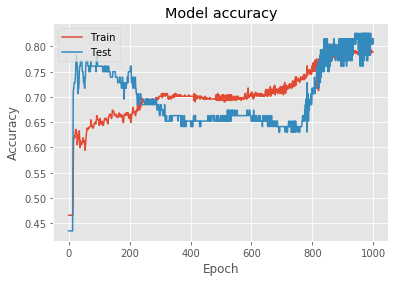

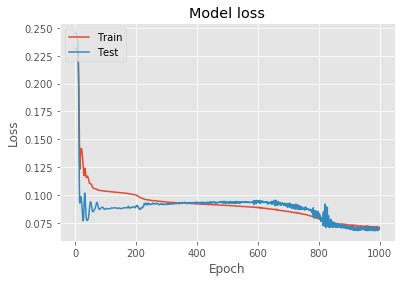

In [43]:
r = 0.2      # learning rate no se usa aqui ya que usaremos pro defecto 0.001
nn = [8, 8, 10,10,10,5,1]  # neuronas por capa.



model = kr.Sequential()#Definimos una secuancia de capas

# Añadimos las capas 
# Activacion de la capa oculta Rectified Linear Unit.
# Activación de la capa de salida sigmoid como una S
l1 = model.add(kr.layers.Dense(nn[0], input_dim=8, activation='relu'))
l2 = model.add(kr.layers.Dense(nn[1], activation='relu'))
l3 = model.add(kr.layers.Dense(nn[2], activation='relu'))
l4 = model.add(kr.layers.Dense(nn[3], activation='relu'))
l5 = model.add(kr.layers.Dense(nn[4], activation='relu'))
l6 = model.add(kr.layers.Dense(nn[5], activation='relu'))
l7 = model.add(kr.layers.Dense(nn[6], activation='sigmoid'))

# Se compila el modelo teniendo en cuanta lo siguiente
# Funcion de coste: binary_crossentropy: calcula considerando el real y la prediccion
# Optimizador: Adam, el cual es una extensión del descenso de gradiente estocástico
# Metrica del rendimiento del modelo: Accuracy
model.compile(loss='logcosh', optimizer='adam', metrics=['acc']) #por defecto lr=0.001

# Se entrena el modelo
history=model.fit(trainX, trainY, epochs=1000,batch_size=1000,validation_data=(testX,testY))
# Evaluamos el modelo
scores = model.evaluate(trainX, trainY)
modeltreeacctrain=scores[1]*100
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# evaluamos el modelo con los datos de prueba
scores = model.evaluate(testX, testY)
modeltreeacctest=scores[1]*100
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# calcula las predicciones
predictions = model.predict(testX)
# redondeamos las predicciones
rounded = [round(x[0]) for x in predictions]

###Plot de datos del modelo

# valores para accuracy 
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# valores para loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
#plot_model(model, to_file='model3.png')

# Matriz de confusión


In [44]:
y_actu = pd.Series(testY, name='Actual')
y_pred = pd.Series(rounded, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(df_confusion)

Predicted  0.0  1.0  All
Actual                  
0           40   12   52
1            5   35   40
All         45   47   92


### Comparando resultados de los 3 modelos de redes 



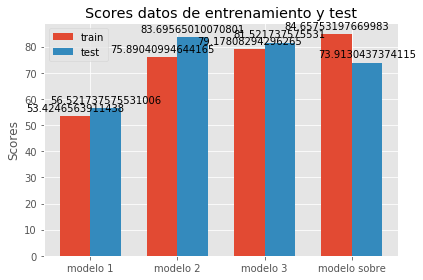

In [45]:
dataplottrain=[modeloneacctrain,modeltwoacctrain,modeltreeacctrain,overtrain]
dataplottest = [modeloneacctest,modeltwoacctest,modeltreeacctest,overtest]
label = ["modelo 1","modelo 2","modelo 3","modelo sobre"]

#para realizar el plot
index = np.arange(len(label))
width = 0.35  #tamaño de las barras
fig, ax = plt.subplots()
rects1 = ax.bar(index - width/2, dataplottrain, width, label='train')
rects2 = ax.bar(index + width/2, dataplottest, width, label='test')

# el texto de las barras 
ax.set_ylabel('Scores')
ax.set_title('Scores datos de entrenamiento y test')
ax.set_xticks(index)
ax.set_xticklabels(label)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

## Comparando y analisando los resultados
A continuación se muestran los scores de naive bayes y arboles de decision en una grafica de barras.

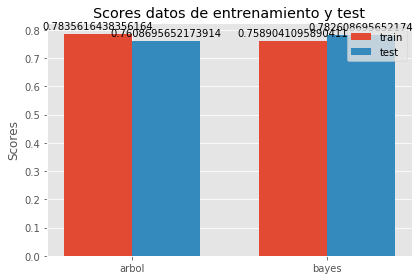

In [46]:
dataplottrain=[score_train_tree,score_bayes_train]
dataplottest = [score_test_tree,score_bayes_test]
label = ["arbol","bayes"]



#para realizar el plot
index = np.arange(len(label))
width = 0.35  #tamaño de las barras
fig, ax = plt.subplots()
rects1 = ax.bar(index - width/2, dataplottrain, width, label='train')
rects2 = ax.bar(index + width/2, dataplottest, width, label='test')

# el texto de las barras 
ax.set_ylabel('Scores')
ax.set_title('Scores datos de entrenamiento y test')
ax.set_xticks(index)
ax.set_xticklabels(label)
ax.legend()


def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


### Precisión

Respecto a la presición se debe observar cuanto fue el grado de acierto con el cual los modelos realizaron la predicción de forma correcta. Sin embargo esto cambiaba con cada ejecución, por tal motivo realizamos 5 ejecuciones y a continuación mostraremos los modelos con mejor presición en cada ejecución


| # ejecución | Mejor         | Segundo Mejor | 1 Train acc | 1 Test acc |2 Train acc | 2 Test acc |
| ----------- | ------------- |-----------    |-------------|------------|-------------|------------|
| 1           | modelo 3 redes| arbol         | 78.64       |76.08       |80.00        |75.00       | 
| 2           | modelo 1 redes| bayes         | 80.55       |  81.52     |77.80        |80.43       |
| 3           | modelo 3 redes| arbol         |81.74        | 78.35      | 77.17       | 79.17      |
| 4           | arbol         | modelo2       |79.45        | 74.91      | 77.80       | 72.82      |
| 5           | modelo 1 redes| bayes         |78.53        | 82.60      | 75.34       | 81.52      |


|#ejecución | tercero | train | test |
|-----------|---------|------|-------|
|1          |bayes    | 75.51|71.26  |
|2          |modelo3  |78.08 |78.26  |
|3          |modelo2  |79.21 |75.00  |
|4          |bayes    |77.80 |72.82  |
|5          |modelo3  |81.09 |74.91  |


- Al analisar las tablas anteriores se observa que en terminos de presición el que mas veces fue el mejor es un empate entre en modelo 3 y el modelo 1. Sin embargo destacamos el modelo 3 ya que en anteriores y posteriores ejecuciones fue el menos preciso.
- Como segundo lugar tenemos un empate entre arboles y naive bayes 


### Estabilidad

Para analizar la estabilidad observamos la diferencia entre  el score de entrenamiento y el de test. Cabe mencionar que el menos estable sin duda es el modelo sobrenetrenado que se realizo para observar mejor este comportamiento. Para ver que tanto se alejaron los datos usaremos la tabla del item anterior y construiremos una con la información necesaria.

| # ejecución | modelo 1      | modelo 2      | modelo 3    | arboles    |bayes        | 
| ----------- | ------------- |-----------    |-------------|------------|-------------|
| 1           | 2.48          | 5.23          | 2.56        |5.00        |4.25         |
| 2           | 0.97          | 3.38          | 0.18        | 4.65       |2.63         |
| 3           | 1.67          | 4.21          | 3.39        | 2.0        | 2.57        | 
| 4           | 2.34          | 4.98          | 3.89        | 4.54       | 4.98        | 
| 5           | 4.07          | 5.89          | 6.18        | 5.99       | 6.18        | 
|total        |11.53          | 23.69         | 16.2        |22.18       | 20.61       |

- Al observar la tabla anterior se concluye que el mas estable es el correspondiente al modelo 1 de redes




###  Interpretabilidad de los resultados

Respecto a la interpretabilidad de los resultados nos enfocaremos a la complejidad de analizar el modelo optenido, Ya que los resultados optenidos por todos los modelos son faciles de interpretar.

En el caso del arbol el resultado se puede interpretar con relativa facilidad, en el caso de bayes las entradas y el resultado es de facil interpretación.

En el caso de las redes neuronales es mucho mas complejo entender el modelo resultado, haciendo de este el modelo con mas inconvneientes a la hora de interpretar los datos. 

### Cual usariamos nosostros

Bajo este contexto plantear una solución cutilizando redes neuronales es interesante, sin embargo se debe observar bien los datos y todas las entradas para lograr un modelo preciso. por tal motivo recomendamos esta opcion siempre que los datos se presten para usarlo.

Respecto a las otras 2 opciones presentan limitaciones en el caso de la cantidad de los datos(Bayes) y la forma de trabajar con ellos(arboles)

### Referencias y material de ayuda

A continuación presentamos el material usado como referencia

#### Medicos
- https://www.msdsalud.es/cuidar-en/colesterol/corazon-colesterol.html?fbclid=IwAR368fqDXBQZK8mV-9LllAeIYbCo7gG8NKrh-XhMUSq01hS_gC9dNVz735I

- https://fundaciondelcorazon.com/prevencion/riesgo-cardiovascular/diabetes.html

- https://medlineplus.gov/spanish/diabeticheartdisease.html

- https://www.texasheart.org/heart-health/heart-information-center/topics/angina-de-pecho/

- https://www.mayoclinic.org/es-es/diseases-conditions/aortic-stenosis/symptoms-causes/syc-20353139

- https://medlineplus.gov/spanish/pruebas-de-laboratorio/niveles-de-colesterol/

- https://www.niddk.nih.gov/health-information/informacion-de-la-salud/diabetes/informacion-general/prevenir-problemas/diabetes-enfermedad-corazon-ataques-cerebrales

#### Tecnicos

- https://www.aprendemachinelearning.com/arbol-de-decision-en-python-clasificacion-y-prediccion/

- https://codeday.me/es/qa/20190217/191242.html

- https://keras.io/

- https://enmilocalfunciona.io/deep-learning-basico-con-keras-parte-1/

Agradecimientos especiales al medico de la universidad del Valle camilo gines por ayudarnos a entender los datos y como rellenarlos
